<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-retail-sales-prediction-/blob/main/CAPSTONE_PROJECT_REGRESSION(retail_sales_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Retail Sales Prediction**

### Project Type - Regression
### Contribution - Individual

# **Project Summary -**





## I decide to do retail sales prediction project .when i download the project i ralize two dataset present in this project but in both dataset have comman colums name store and both column have same unique values.So i realized in secod dataset have some null values so i decide to replace null values. first data contain more columns compare to second dataset i decide to merge the dataset with left joind on first dataset . Then i check the correlation of all the numerical features with each other . Then remove the columns having higher vif and lower vorrelation with the target column name sales. then i check distribution of categorical features . then i am convertion categorical columns into numerical using label encoding . 

## **GitHub Link:** 
### https://github.com/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-retail-sales-prediction-


# **Problem Statement**



## Retail Sales Prediction is a regression machine learning project. Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.



# Importing the libraries

In [ ]:
# IMPORTIGN LIBRARY
import numpy as np
import pandas as pd
from numpy import math

# visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# null value visualization Library
import missingno as msno

# Model Testing Library
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Library
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor 

# Dataset Loading

In [ ]:
# mount a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file path of dataset
path1='/content/drive/MyDrive/Almabetter/Machine Learning /Rossmann Stores Data.csv'         #Rossman stores dataset
path2='/content/drive/MyDrive/Almabetter/Machine Learning /store (1).csv'                    #Stores dataset
df=pd.read_csv(path1)
store=pd.read_csv(path2)

<ipython-input-4-9e955d60c794>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path1)


### Dataset First View

In [ ]:
#Rossman stores dataset
df.head()                 

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
#Rossman stores dataset
df.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [ ]:
#Stores dataset
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [ ]:
#Stores dataset
store.tail()

Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count   #Rossman stores dataset
df.shape                                            

(1017209, 9)

In [ ]:
# Dataset Rows & Columns count   #Stores dataset
store.shape                                         

(1115, 10)

### Dataset Information

In [ ]:
#checking info of data             #Stores dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Dataset Rows & Columns count   #Rossman stores dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## **About dataset:**
### This dataset contain information about over 3,000 drug stores in 7 European countries. 
### Rossmann Stores dataset has 1017209 rows and 9 columns in this columns 7 columns is numerical and 2 columns is categorical. 
### Store dataset has 1115 rows and 10 columns in this columns 3 columns is categorical and 3 columns is numerical. 




In [ ]:
# Dataset Describe                       #stores dataset
store.describe(include='all')

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

In [ ]:
# Dataset Describe                          #Rossman stores dataset
df.describe(include='all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

## Duplicate Values

In [ ]:
# Checking duplicat values       #Rossman stores dataset
duplicate1 = df[df.duplicated()]
duplicate1

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []

In [ ]:
# Checking duplicat values       #stores dataset
duplicate2 =store[store.duplicated()] 
duplicate2

Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

## No duplicate values ​​are present in this dataset

## Missing Values/Null Values

In [ ]:
# Checking missing values                                   #Rossman stores dataset
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store.isnull().sum().sort_values(ascending=False)            #Stores dataset

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

<Axes: >

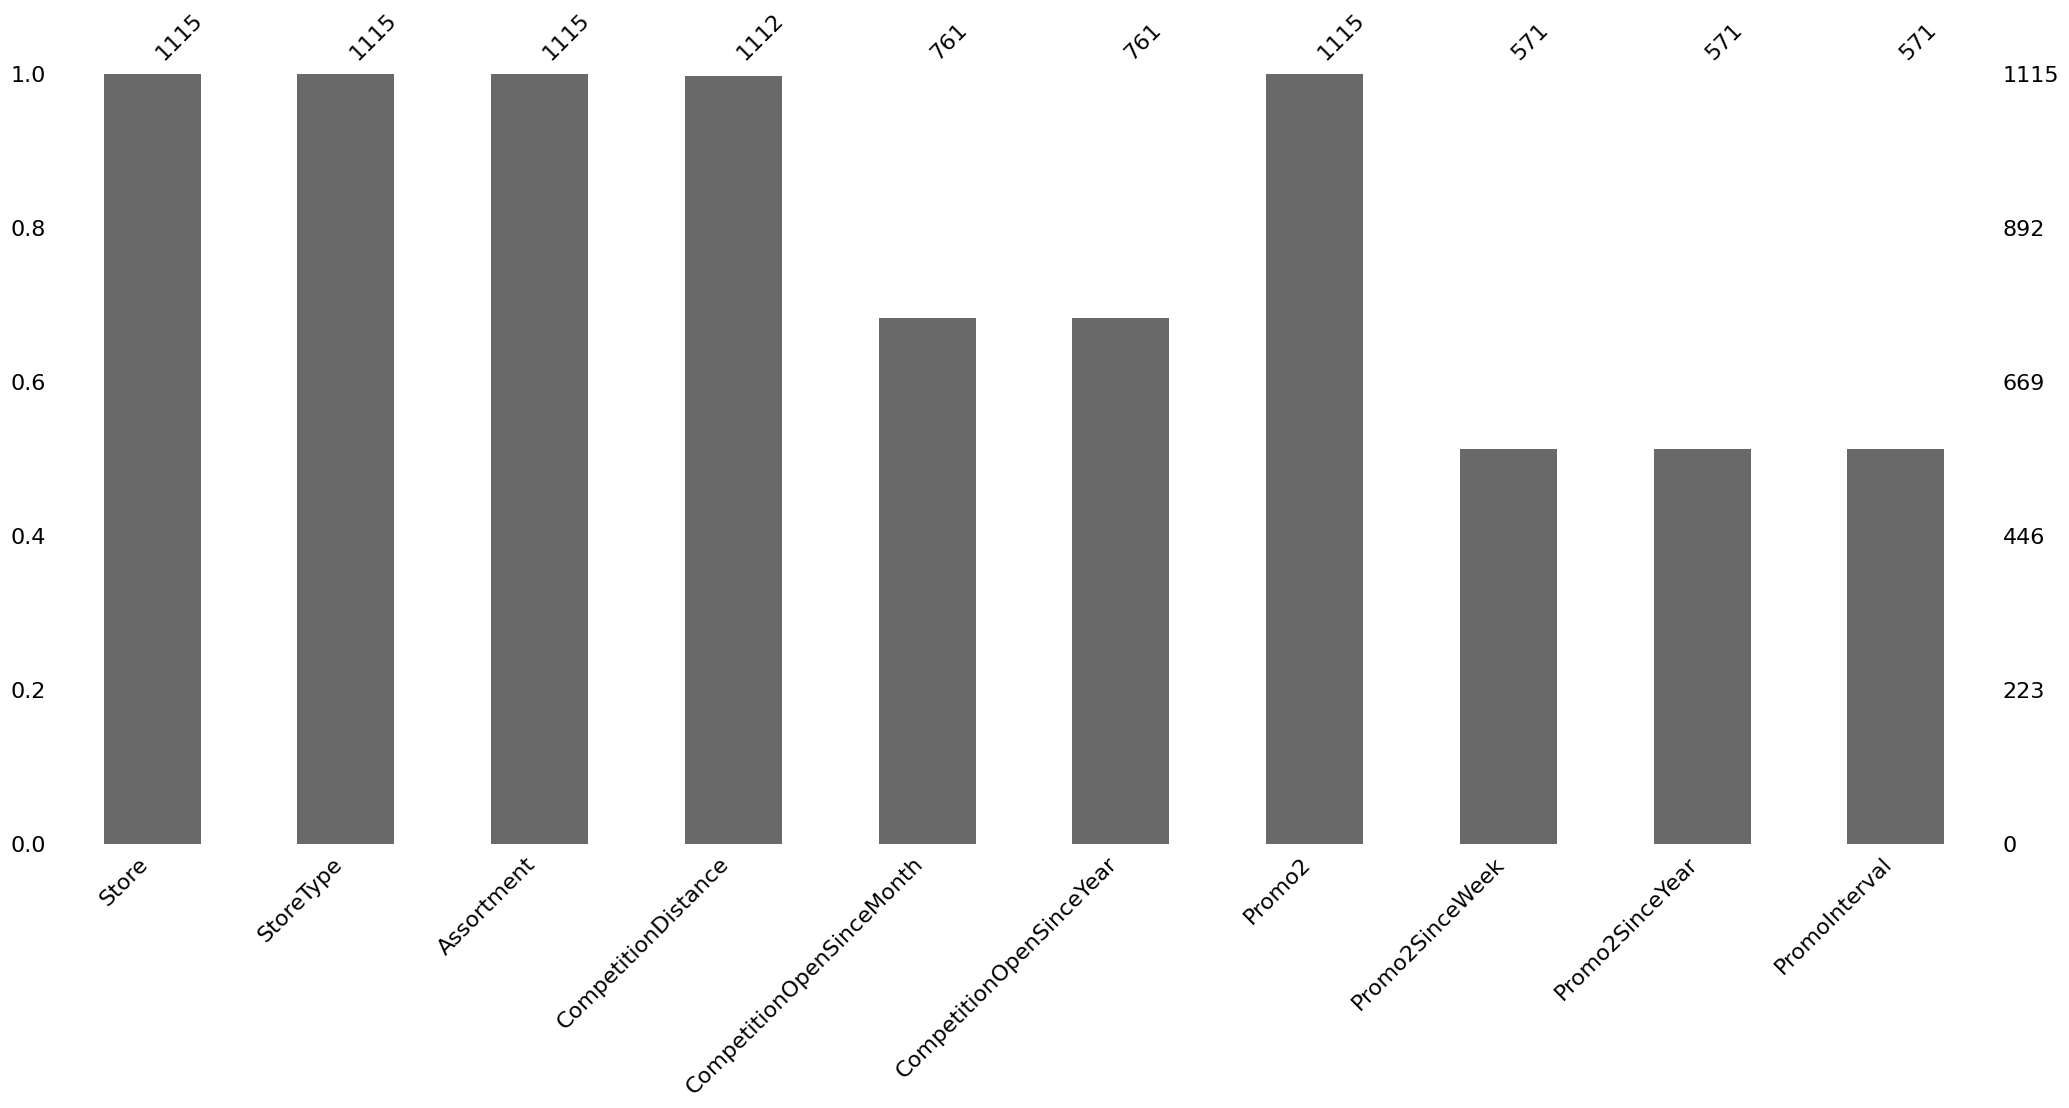

In [ ]:
# Visualizing the missing values
msno.bar(store)

## As we saw there are null values in columns. we are replacing missing values.

In [ ]:
#replacing competitionDistance missing values with mode values 
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mode()[0], inplace = True)

#replacing missing values with 0
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)

store['CompetitionOpenSinceMonth']= store['CompetitionOpenSinceMonth'].fillna(0)

store['CompetitionOpenSinceYear']= store['CompetitionOpenSinceYear'].fillna(0 )

store['Promo2SinceWeek']= store['Promo2SinceWeek'].fillna(0 )

store['Promo2SinceYear']= store['Promo2SinceYear'].fillna(0)

store['PromoInterval']= store['PromoInterval'].fillna(0)

#**about null values :**
### In this column competitiondistance column I replace null values ​​using mode In this dataset where the value of promo2 is equal to zero, there are zero values ​​for these other columns.so i replace these null values ​​by using 0

<Axes: >

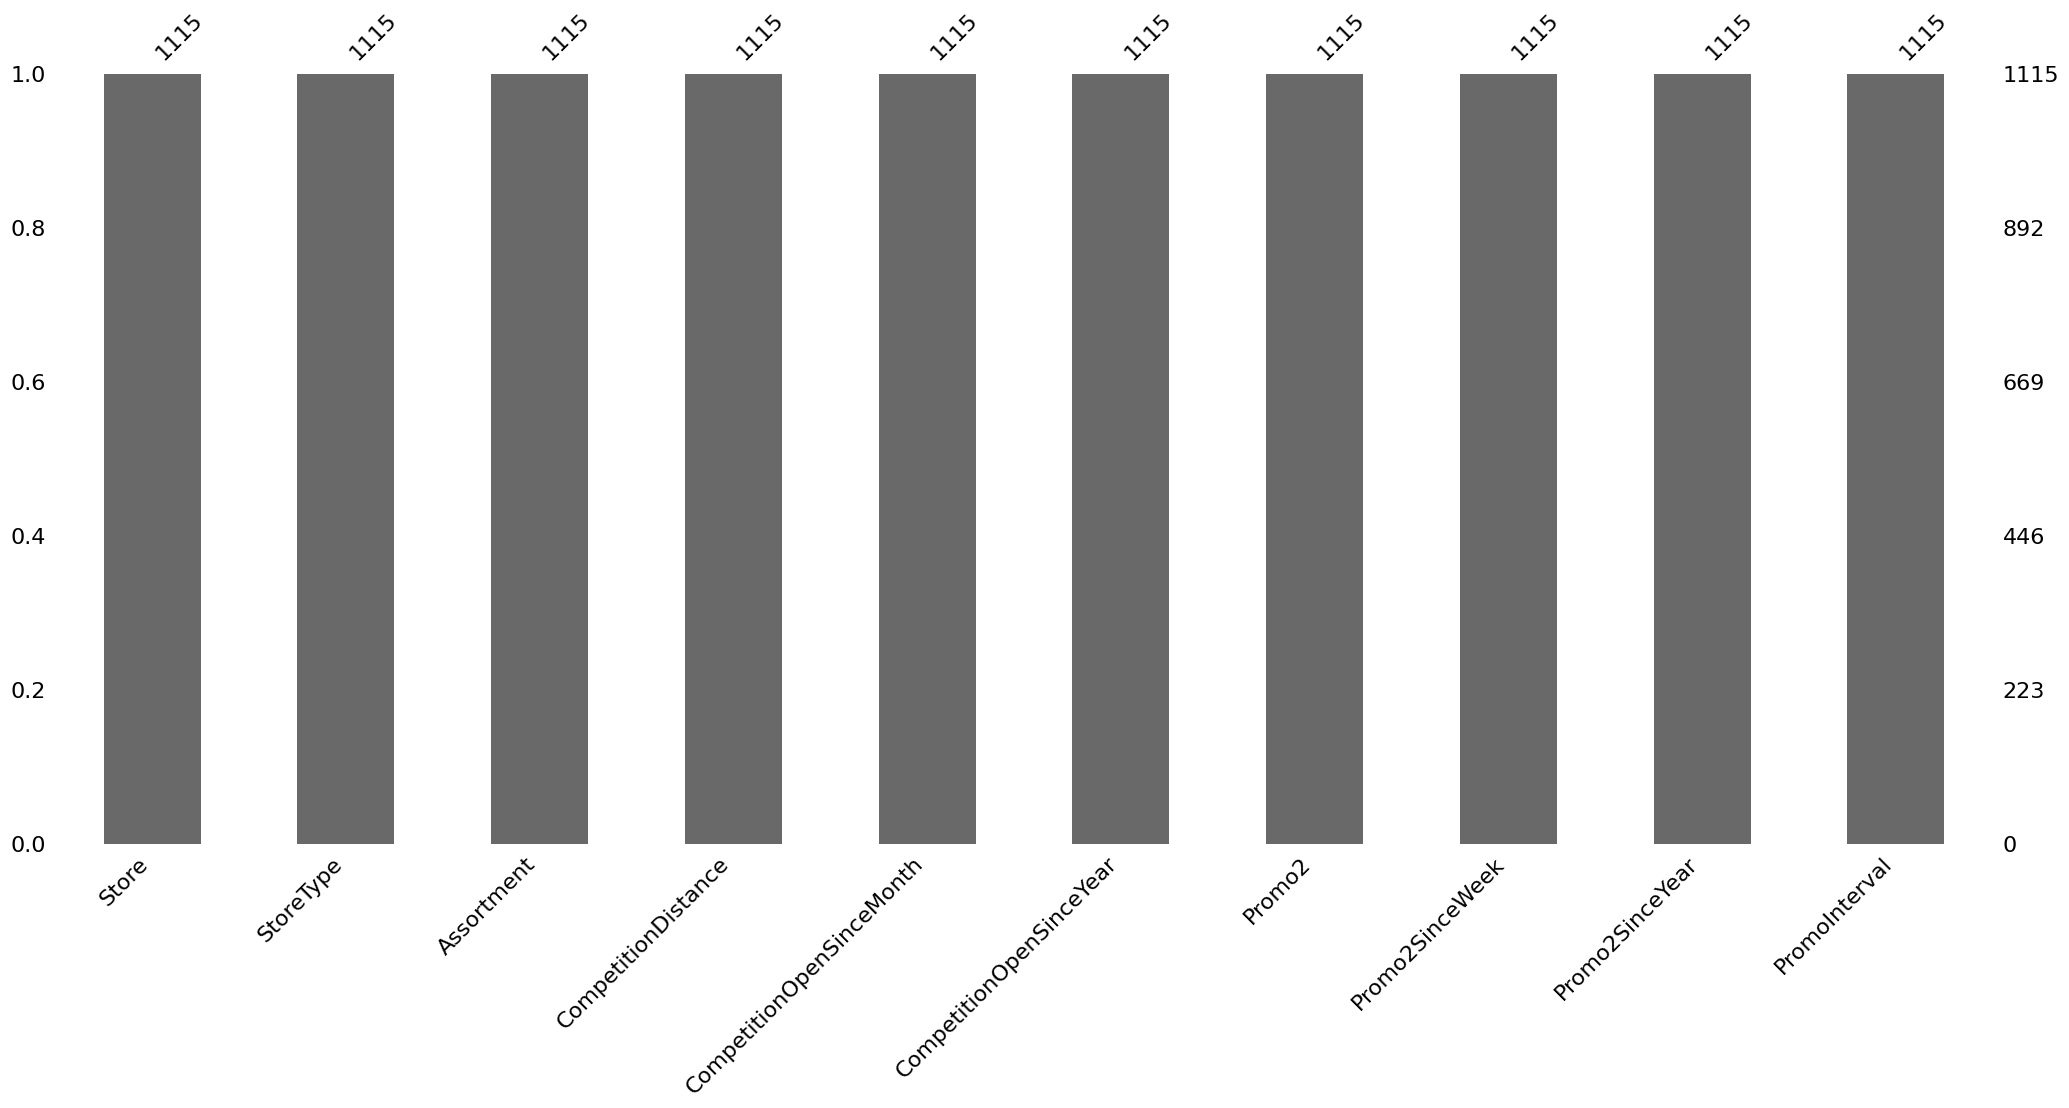

In [ ]:
# Visualizing the missing values
msno.bar(store)

## **Check Unique Values for each variable.**

In [ ]:
# Checking unique values                                     #Rossman stores dataset
df.nunique(dropna = True).sort_values(ascending=False)

Sales            21734
Customers         4086
Store             1115
Date               942
DayOfWeek            7
StateHoliday         5
Open                 2
Promo                2
SchoolHoliday        2
dtype: int64

In [ ]:
# Checking unique values                                    # stores dataset
store.nunique(dropna = True).sort_values(ascending=False)

Store                        1115
CompetitionDistance           654
Promo2SinceWeek                25
CompetitionOpenSinceYear       24
CompetitionOpenSinceMonth      13
Promo2SinceYear                 8
StoreType                       4
PromoInterval                   4
Assortment                      3
Promo2                          2
dtype: int64

##mergeing rosman and store dataset on store column

In [ ]:
# mergeing rosman and store dataset on store column
project=pd.merge(left=df,right=store,how='left',on=['Store'])

In [ ]:
# final dataset first view
project.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              0.0              0.0                0  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              0.0              0.0                0  
4              0.0              0.0                0

In [ ]:
# final Dataset Rows & Columns count 
project.shape

(1017209, 18)

## **about joining two datasets:** 
## Both the datasets have the same column store and the unique values ​​present in these two columns are the same

# Outliers

In [ ]:
# Checking outliers
outs=project.describe().columns         

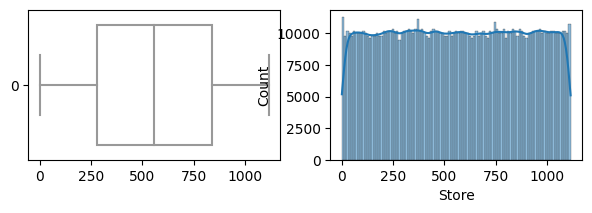

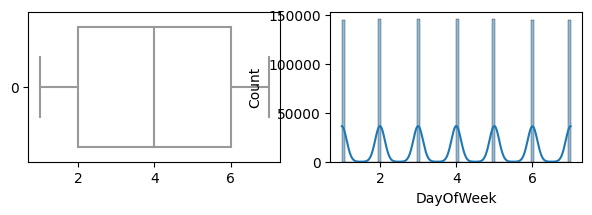

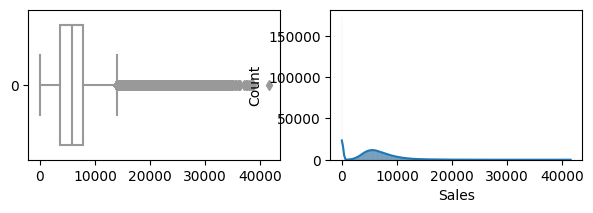

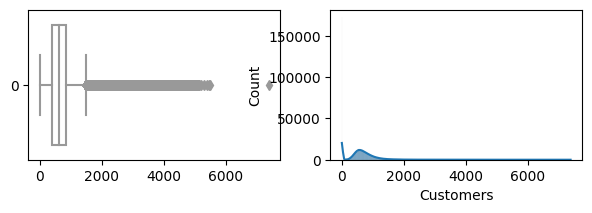

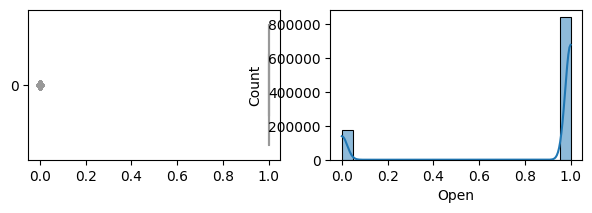

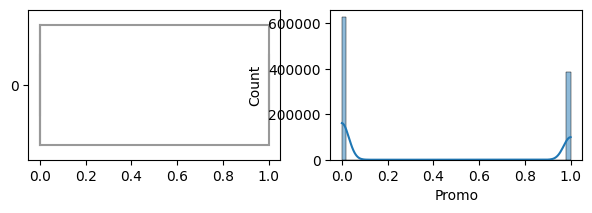

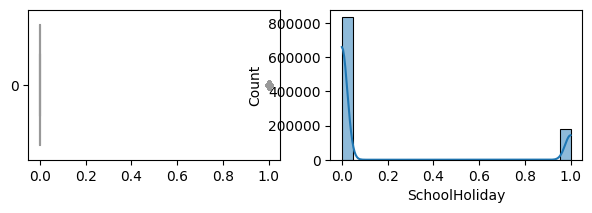

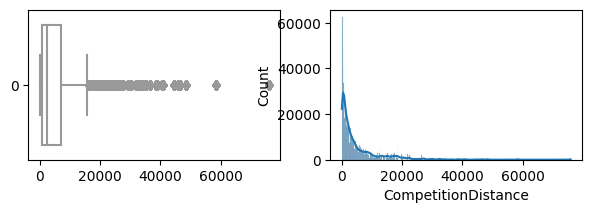

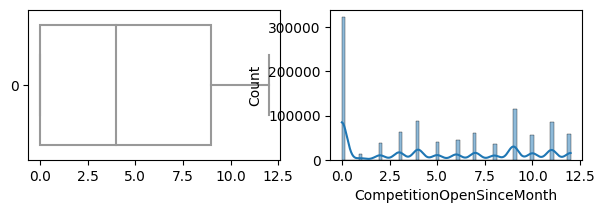

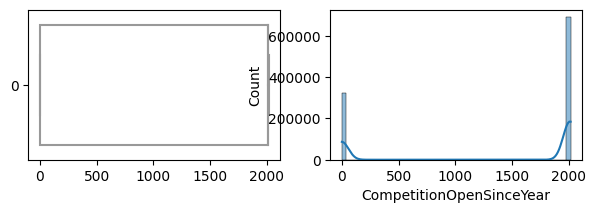

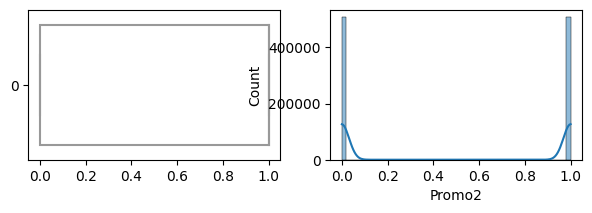

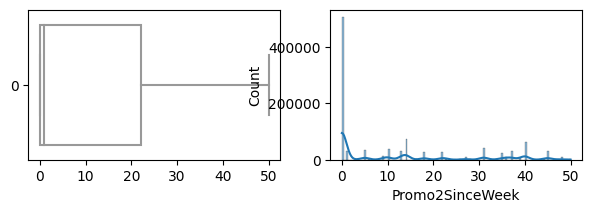

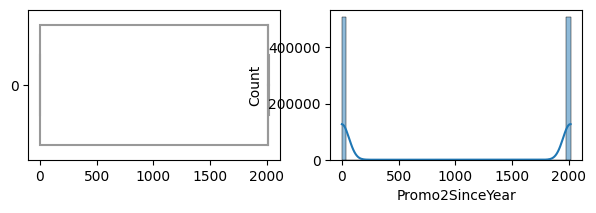

In [ ]:
# outliers visualization 
for i in outs:
  plt.figure(figsize=(50,30))
  a=+1
  b=a+1
  plt.subplot(len(outs),len(outs),a)
  sns.boxplot(project[i],orient="h", color='w')
  plt.subplot(len(outs),len(outs),b)
  sns.histplot(project[i], kde=True)
plt.show()

# **about outliers :**
## When we look at this outlier visualization chart. Chart showing customers column and sales column having some outliers i decide to remove those outliers 

In [ ]:
#removing outliers function
def remove_outlier(df_in, columname):
    q1 = df_in[columname].quantile(0.25)
    q3 = df_in[columname].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[columname] > fence_low) & (df_in[columname] < fence_high)]
    return df_out

In [ ]:
#removing outliers 
project= remove_outlier(project, 'Sales')

## **Understanding Your Variables**

# Dataset Columns
###Id - an Id that represents a (Store, Date) duple within the test set
  
###Store - a unique Id for each store

###Sales - the turnover for any given day (this is what you are predicting)

###Customers - the number of customers on a given day

###Open - an indicator for whether the store was open: 0 = closed, 1 = open

###StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on 

###public holidays and weekends. a = public holiday, b = Easter holiday, c = 

###Christmas, 0 = None

###SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

###StoreType - differentiates between 4 different store models: a, b, c, d

###Assortment - describes an assortment level: a = basic, b = extra, c = extended

###CompetitionDistance - distance in meters to the nearest competitor store

###CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

###Promo - indicates whether a store is running a promo on that day

###Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 =store is not participating, 1 = store is participating

###Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

###PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## **Check Unique Values for each variable.**

In [ ]:
# Check Unique Values for each variable.
project.nunique(dropna = True).sort_values(ascending=False)

Sales                        13194
Customers                     3305
Store                         1115
Date                           942
CompetitionDistance            654
Promo2SinceWeek                 25
CompetitionOpenSinceYear        24
CompetitionOpenSinceMonth       13
Promo2SinceYear                  8
DayOfWeek                        7
StateHoliday                     5
StoreType                        4
PromoInterval                    4
Assortment                       3
SchoolHoliday                    2
Promo2                           2
Promo                            2
Open                             2
dtype: int64

In [ ]:
# Date columns to Date format conversion
project['Date']=pd.to_datetime(project['Date'])

In [ ]:
#creating new month ,year,day of week ,weekdays weekend and average sales by percustomers column 
project['month'] = project['Date'].apply(lambda x : x.month)
project['year'] = project['Date'].apply(lambda x : x.year)
project['day_of_week'] = project['Date'].dt.day_name()
project['weekdays_weekend']=project['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
project['avg']=project['Sales']/project['Customers']

# **Exploratory Data Analysis**

# Store Comparison

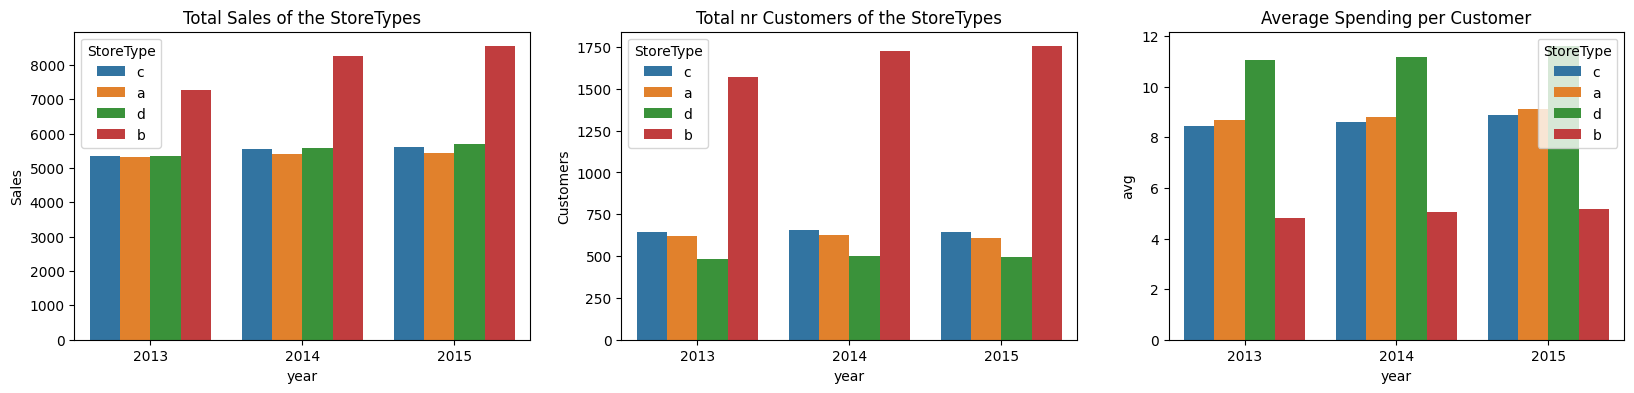

In [ ]:
#store comparison visualization 
f, ax = plt.subplots(1,3, figsize = (20,4))

a=sns.barplot(x="year", y="Sales",  ax = ax[0],hue='StoreType', data=project, errorbar=None)
b=sns.barplot(x="year", y="Customers",  ax = ax[1],hue='StoreType', data=project, errorbar=None)
c=sns.barplot(x="year", y="avg",  ax = ax[2],hue='StoreType', data=project, errorbar=None)
#barplot title 
a.set_title("Total Sales of the StoreTypes")
b.set_title("Total nr Customers of the StoreTypes")
c.set_title("Average Spending per Customer")
plt.subplots_adjust(hspace = 0.3)
plt.show()

## **insights:**
### * Store Type B has the most sales and customers 
### * Store Type D has the highest average spend per customer

# Business throughout the every year


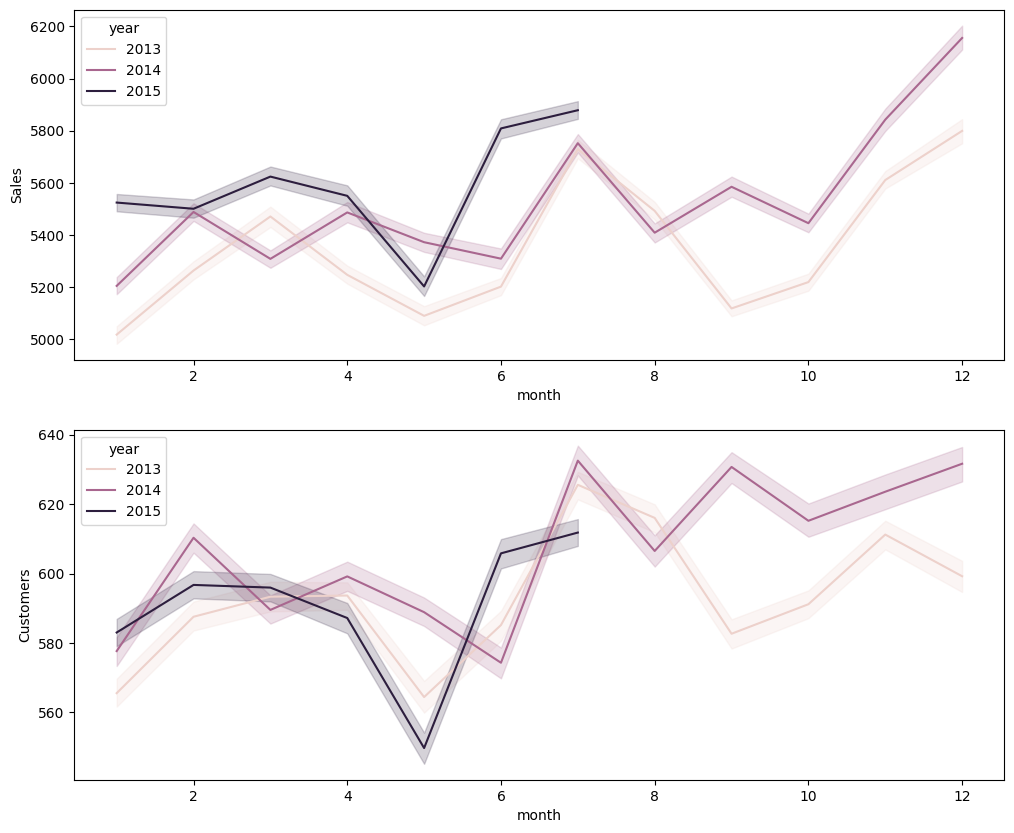

In [ ]:
#creating a line cart for sales and customers
f, ax = plt.subplots(2,1, figsize = (12,10))
sns.lineplot(ax = ax[0],x="month", y="Sales", data=project,hue = 'year')
sns.lineplot(ax = ax[1],x="month", y="Customers", data=project,hue = 'year')
plt.show()

## **insights:**
## * In year 2015 sales increased but customers decreasing

# Weekdays and weekend comparison

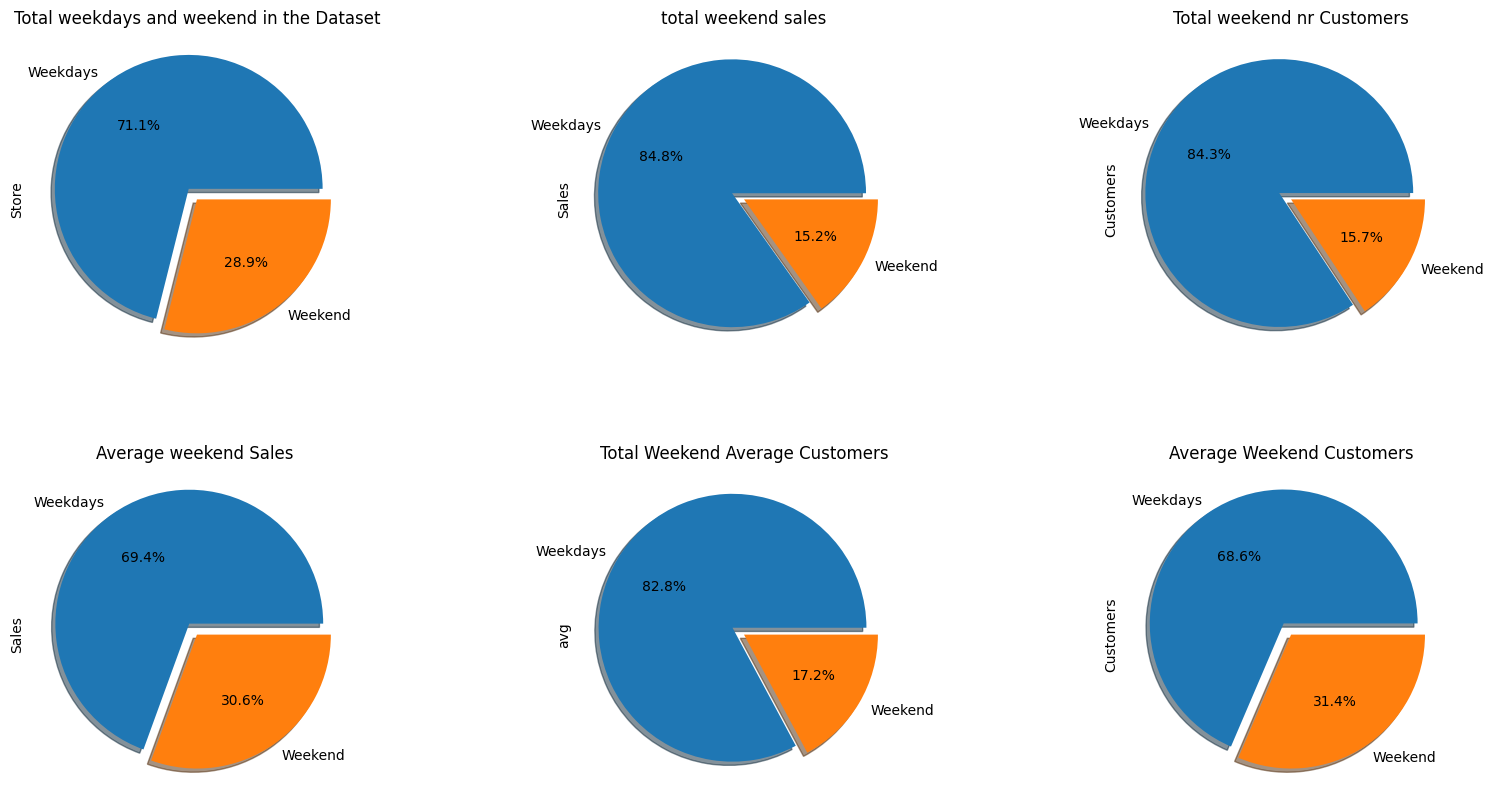

In [ ]:
#weekend comparison visualization 
f, ax = plt.subplots(2,3, figsize = (20,10))

labels = 'Weekdays' , 'Weekend'
explode = (0.1, 0.0)
project.groupby("weekdays_weekend")["Store"].count().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%',ax = ax[0, 0],title = "Total weekdays and weekend in the Dataset")
project.groupby("weekdays_weekend")["Sales"].sum().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%', ax = ax[0,1], title = "total weekend sales")
project.groupby("weekdays_weekend")["Customers"].sum().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%', ax = ax[0,2], title = "Total weekend nr Customers")
project.groupby("weekdays_weekend")['avg'].sum().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%', ax = ax[1,1], title = "Total Weekend Average Customers")
project.groupby("weekdays_weekend")["Sales"].mean().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%', ax = ax[1,0], title = "Average weekend Sales ")
project.groupby("weekdays_weekend")["Customers"].mean().plot(kind = "pie", labels=labels,shadow=True,explode=explode,
                                                          autopct='%1.1f%%', ax = ax[1,2], title = "Average Weekend Customers")

plt.subplots_adjust(hspace = 0.3)
plt.show()

## **insights:**
### * 29% of weekends are present in our dataset
### * There are fewer sales on weekends than on weekdays but most of the great deals are on the weekend

## Sales comparison during school holiday

In [ ]:
# group by schoolholiday and get values
school=project.groupby('SchoolHoliday')['SchoolHoliday'].count()

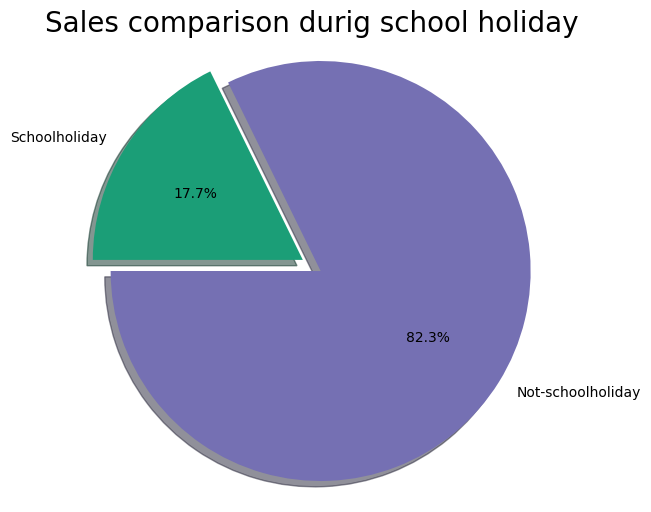

In [ ]:
# creating the pie plot
labels = 'Not-schoolholiday' , 'Schoolholiday'
sizes = school
colors = [ "#7570B3","#1B9E77"]
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales comparison durig school holiday",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


## **insights:**
## School holiday affects 17% of our business

# Business throughout the year

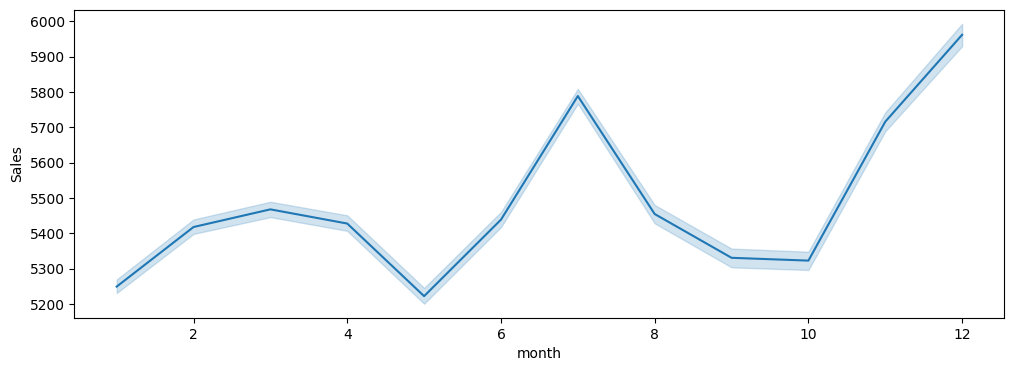

In [ ]:
#Creating line plot for sales throughout the year
fig = plt.figure(figsize = (12, 4))
sns.lineplot(x="month", y="Sales", data=project)
plt.show()

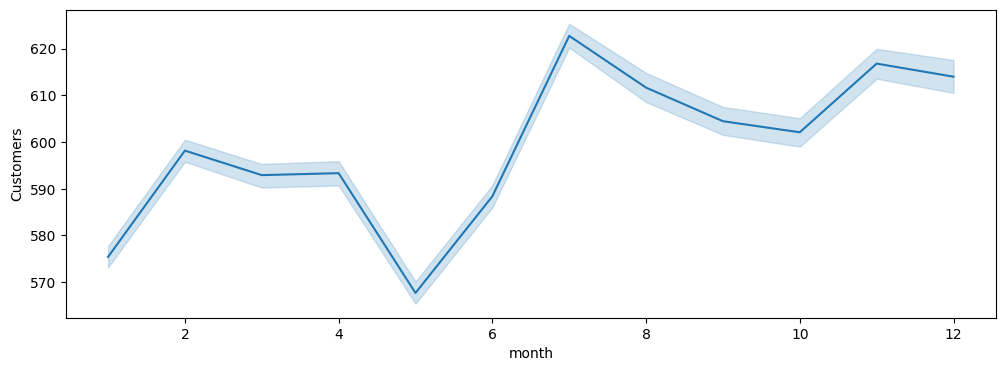

In [ ]:
#Creating line plot for customers throughout the year
fig = plt.figure(figsize = (12, 4))
sns.lineplot(x="month", y="Customers", data=project)
plt.show()

## **insights:**
## * Sales and customers both increase at the end of the year
## * Christmas festival is good for our business

# Year comparison

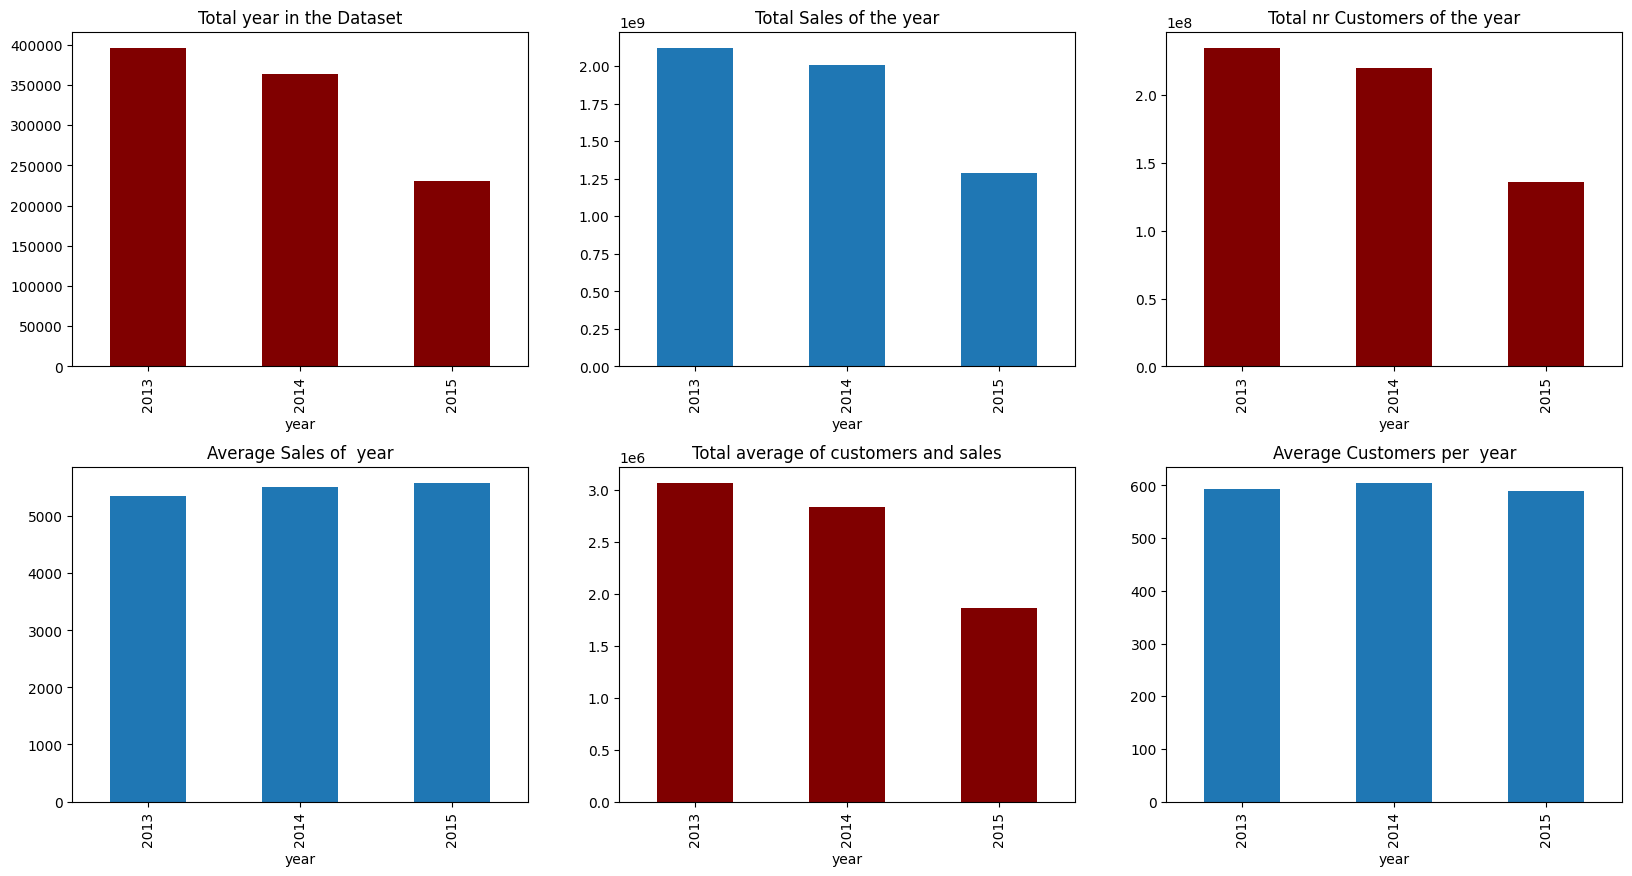

In [ ]:
#Year comparison visualization 
f, ax = plt.subplots(2,3, figsize = (20,10))

project.groupby("year")["Store"].count().plot(kind = "bar", ax = ax[0, 0],color='maroon', title = "Total year in the Dataset")
project.groupby("year")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the year")
project.groupby("year")["Customers"].sum().plot(kind = "bar", ax = ax[0,2],color='maroon', title = "Total nr Customers of the year")
project.groupby("year")['avg'].sum().plot(kind = "bar", ax = ax[1,1],color='maroon', title = "Total average of customers and sales")
project.groupby("year")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of  year")
project.groupby("year")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per  year")

plt.subplots_adjust(hspace = 0.3)
plt.show()

## **insights:**
## * our business growth is slowing compared to the previous year in terms of sales and customers

# performence during promotion

In [ ]:
# group by promotion and get avr of per store
per=project.groupby(['Promo']).agg({'Sales':'sum','Promo2':'count'})
per['avg']=per['Sales']/per['Promo2']
per.drop(['Sales','Promo2'],axis=1,inplace=True)

<Figure size 1000x500 with 0 Axes>

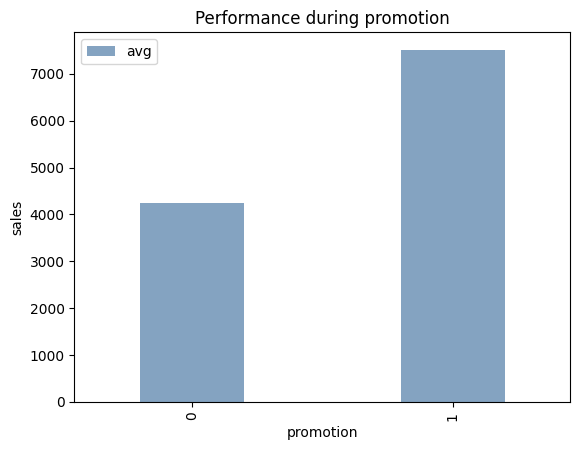

In [ ]:
# creating the bar plot
plt.figure(figsize = (10, 5))
per.plot.bar( color =(0.2, 0.4, 0.6, 0.6),
        width = 0.4)
plt.xlabel("promotion")
plt.ylabel("sales")
plt.title("Performance during promotion")
plt.show()

## **insights:**
## * compare to sales promotion affect our bussines

<ipython-input-45-6b583bca9aa2>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(project['Sales'], shade=True, bw=0.5, color="black")
<ipython-input-45-6b583bca9aa2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(project['Sales'], shade=True, bw=0.5, color="black")


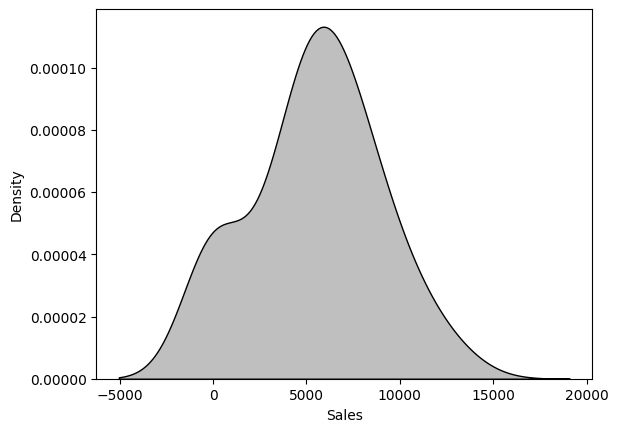

In [ ]:
#visualising distribution for output veriable 
sns.kdeplot(project['Sales'], shade=True, bw=0.5, color="black")
plt.show()

In [ ]:
 #numerical feature (int,flote column)
numeric_features = project.describe().columns

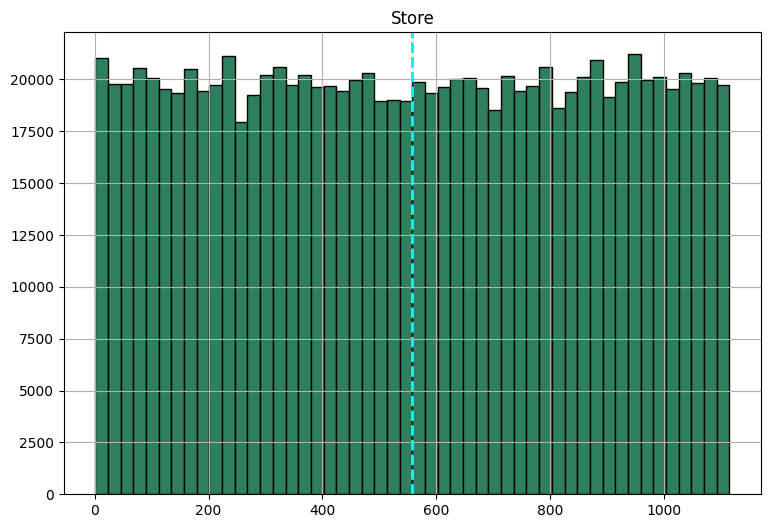

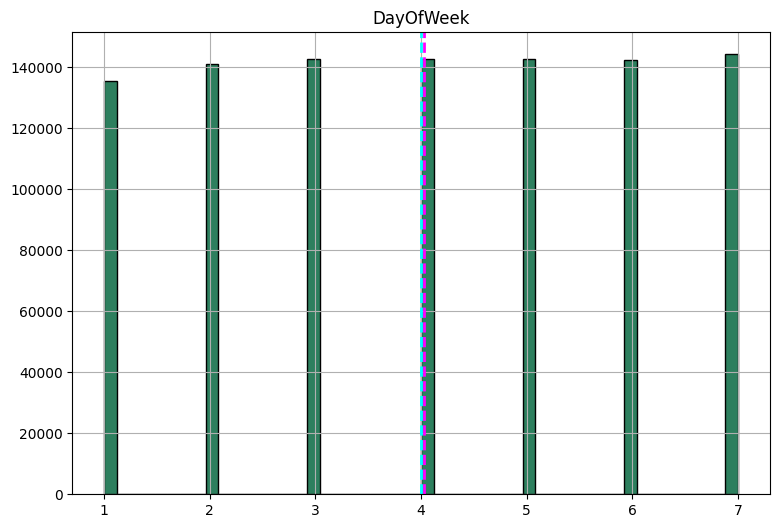

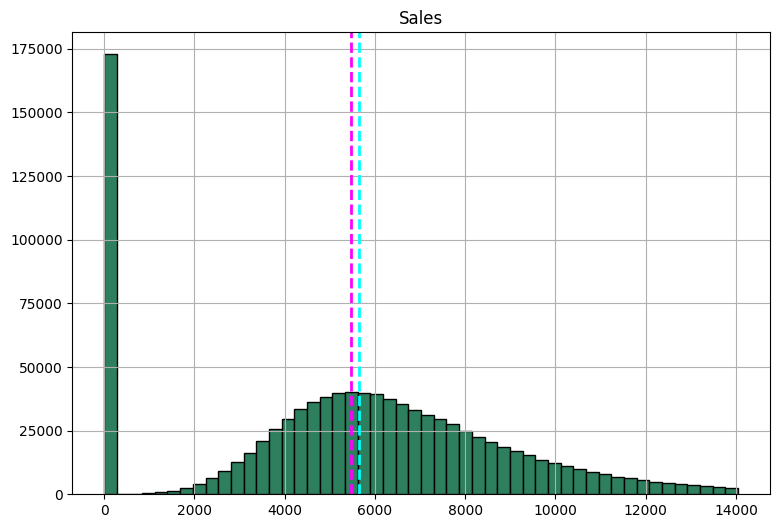

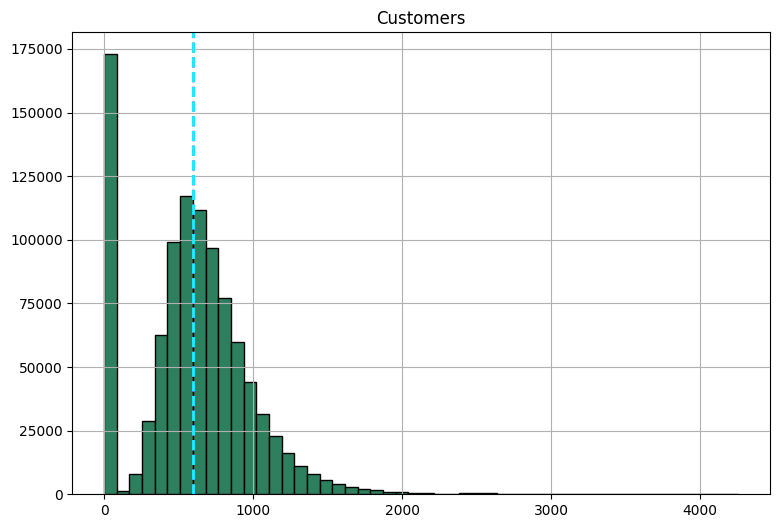

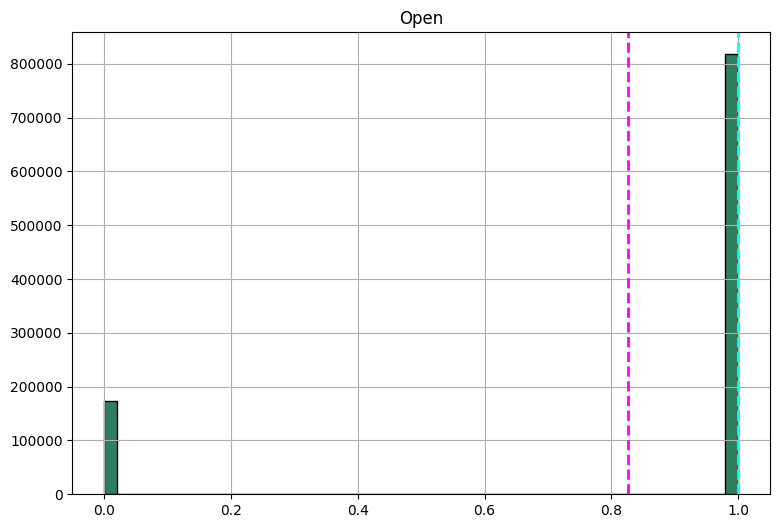

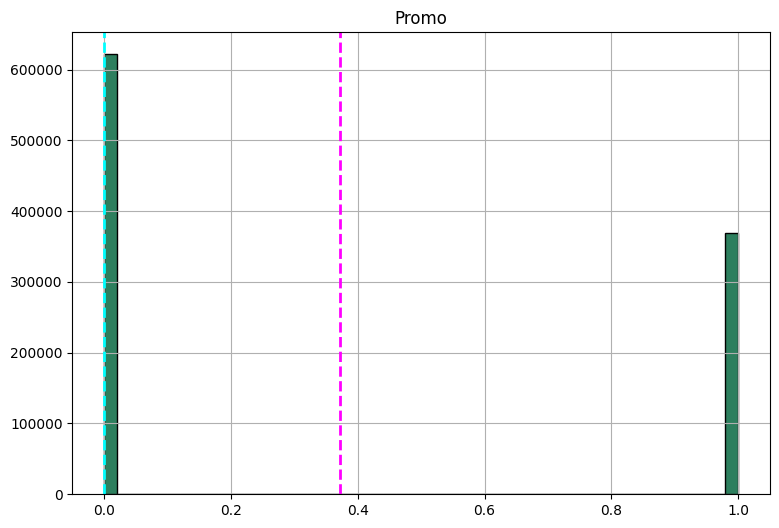

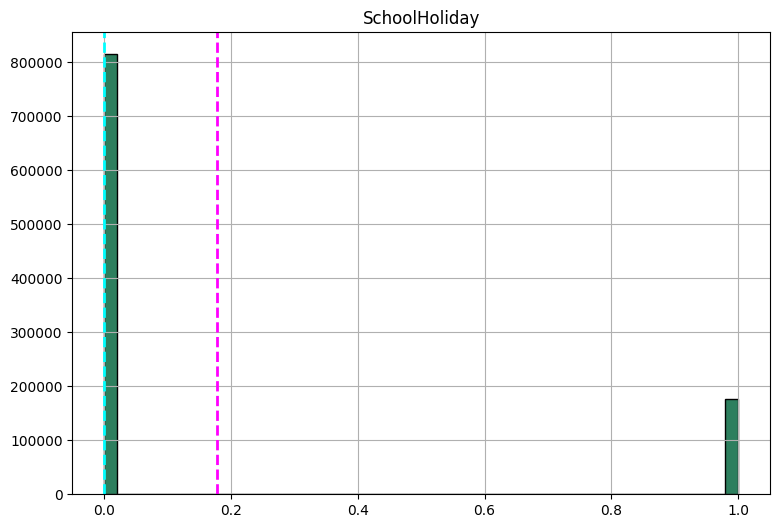

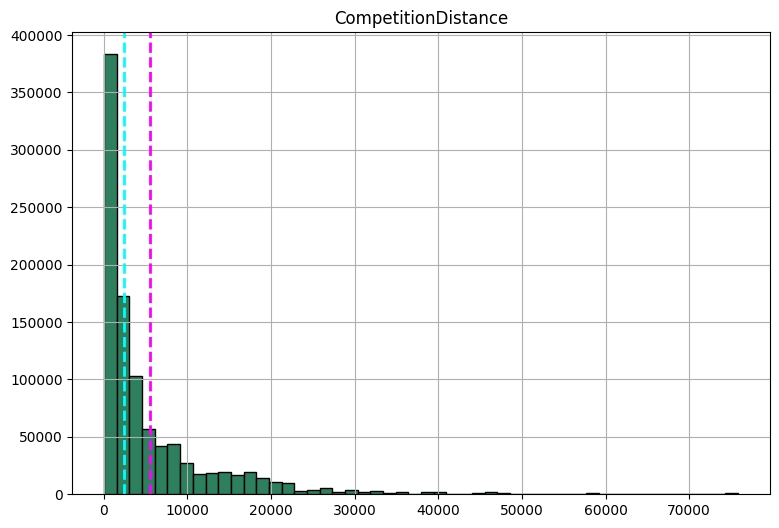

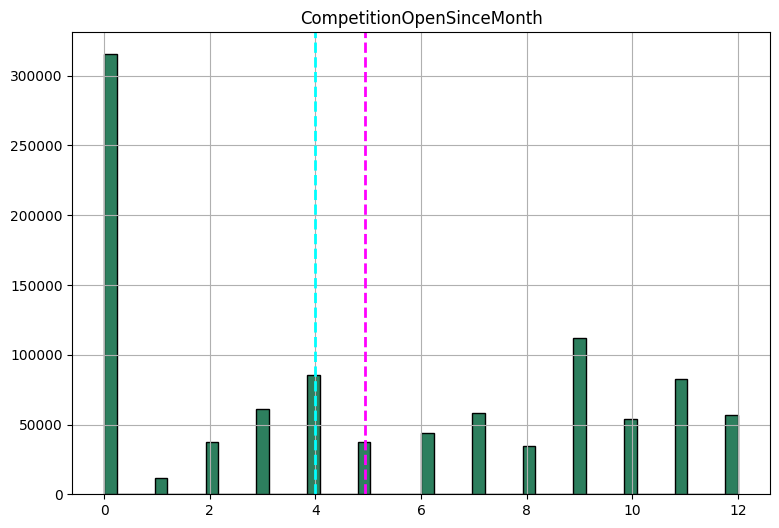

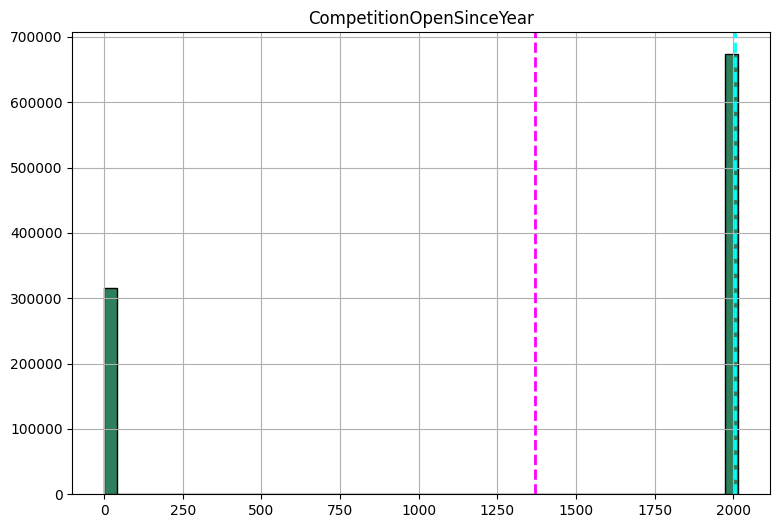

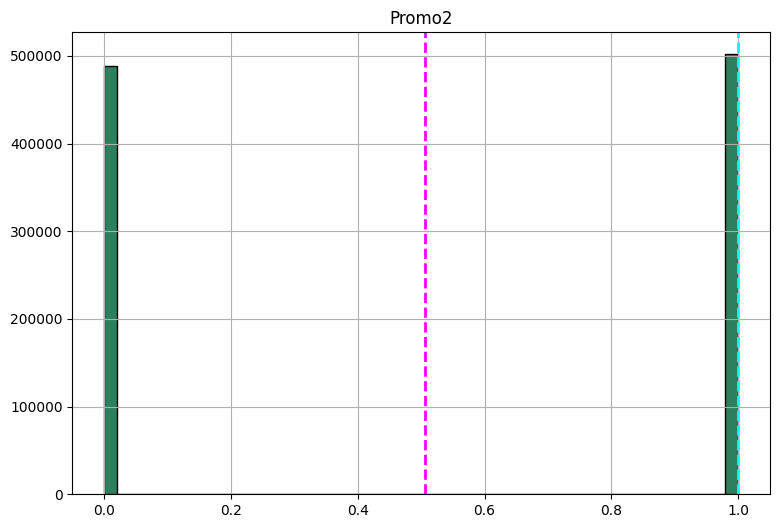

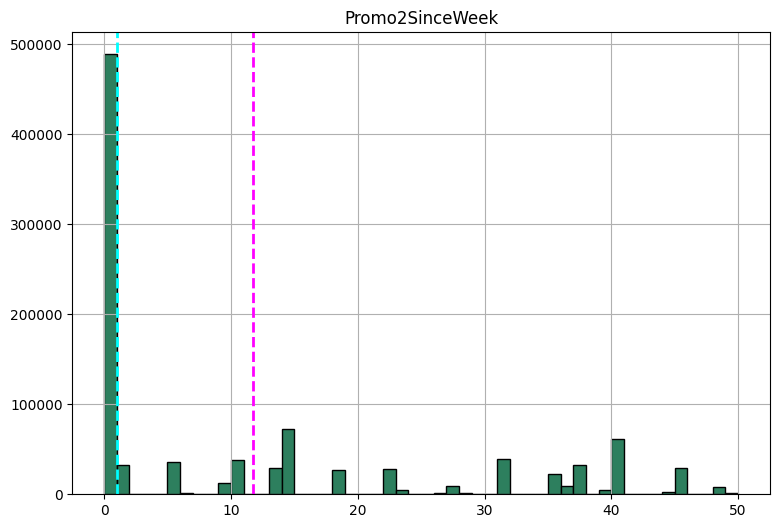

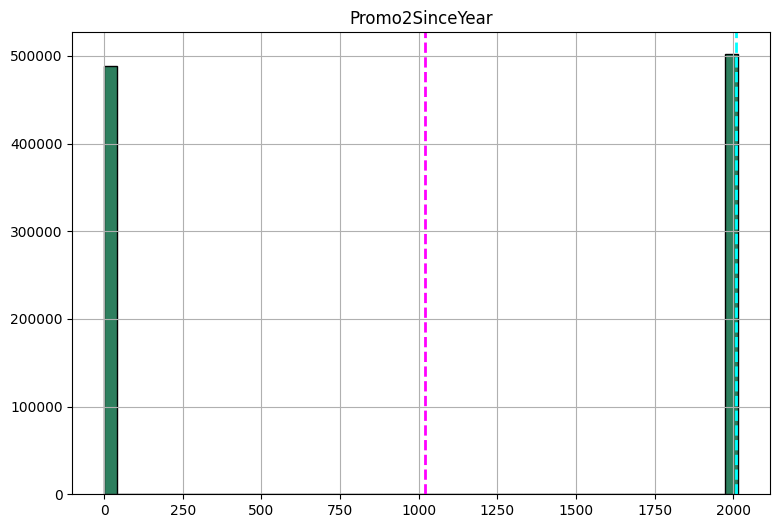

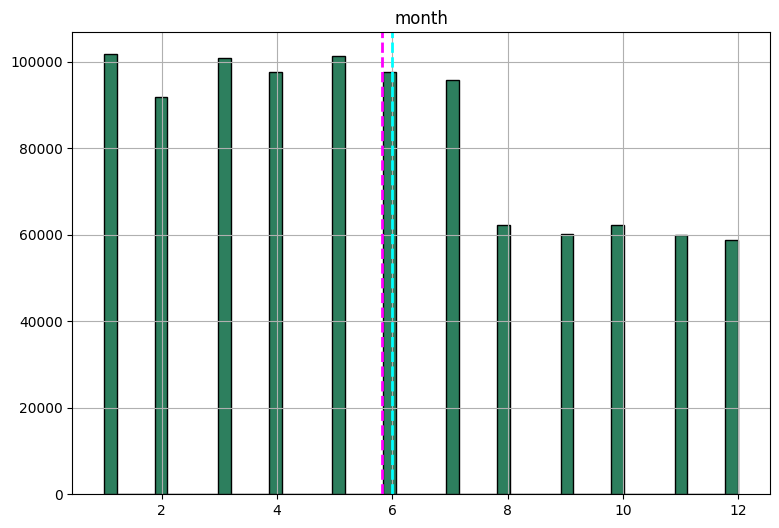

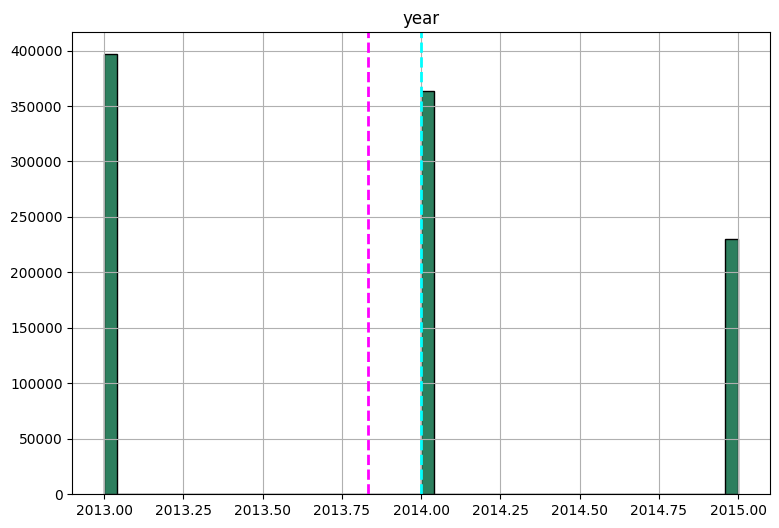

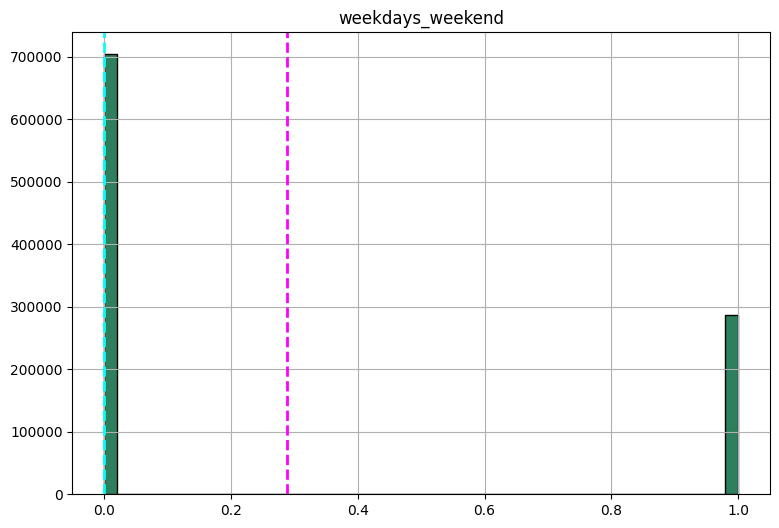

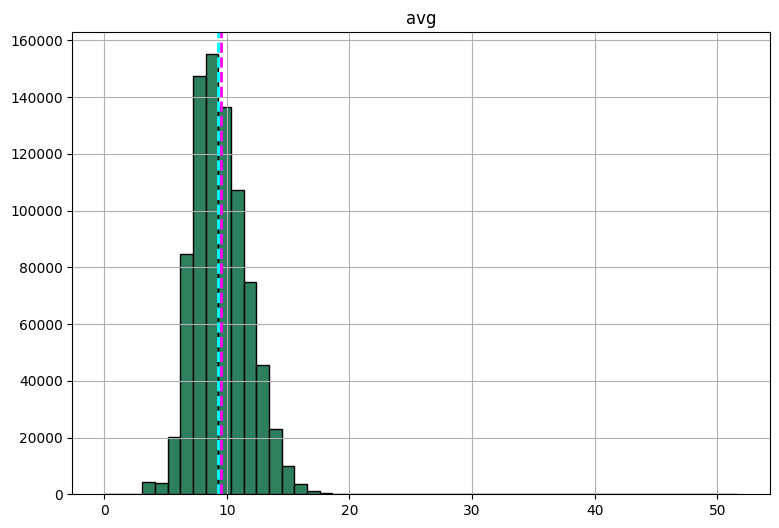

In [ ]:
#visualising distribution for input veriable 
for i in numeric_features:

  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = project[i]
  feature.hist(bins=50, ax = ax,edgecolor="black", color='#2d7f5e')
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

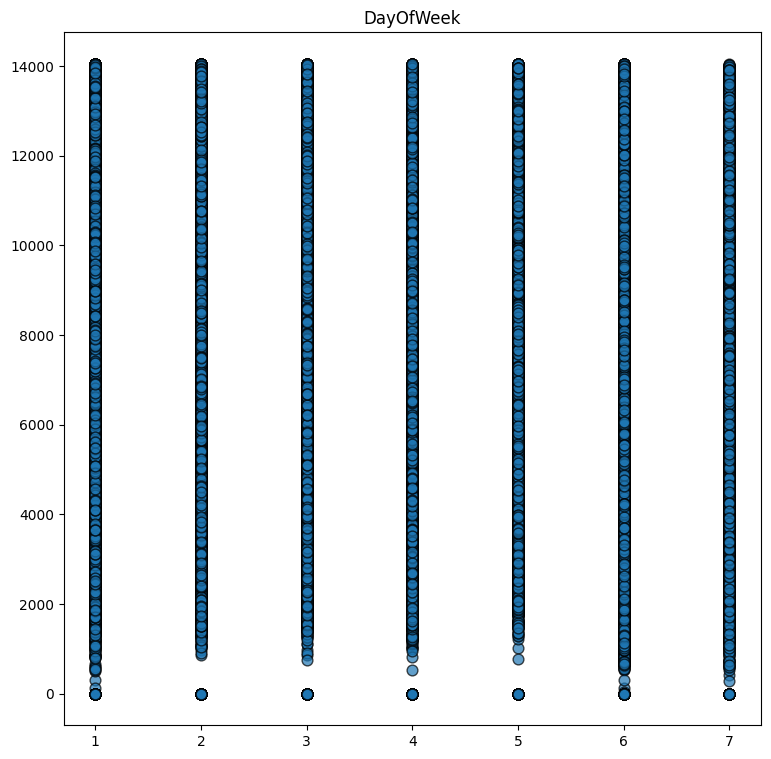

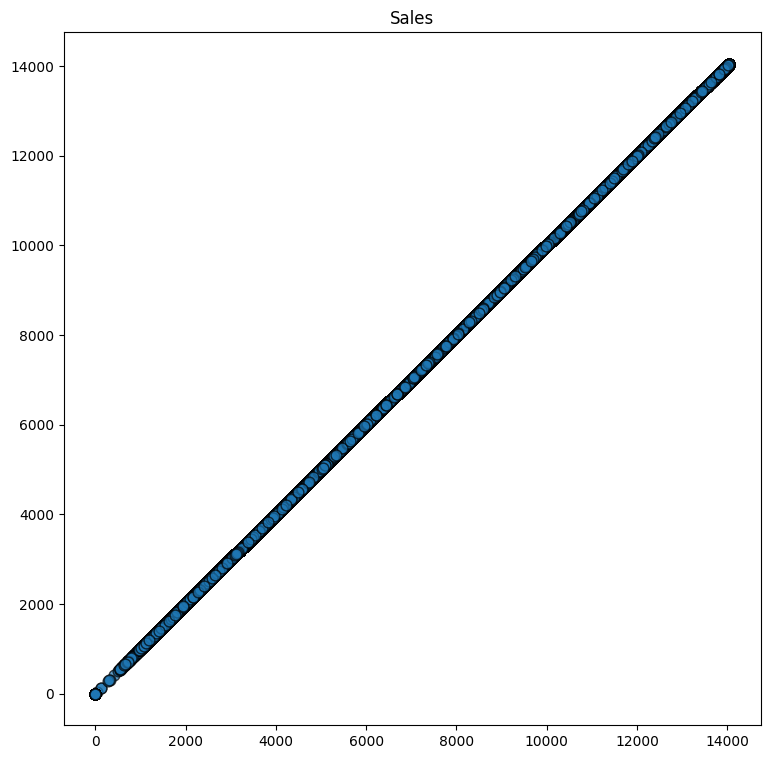

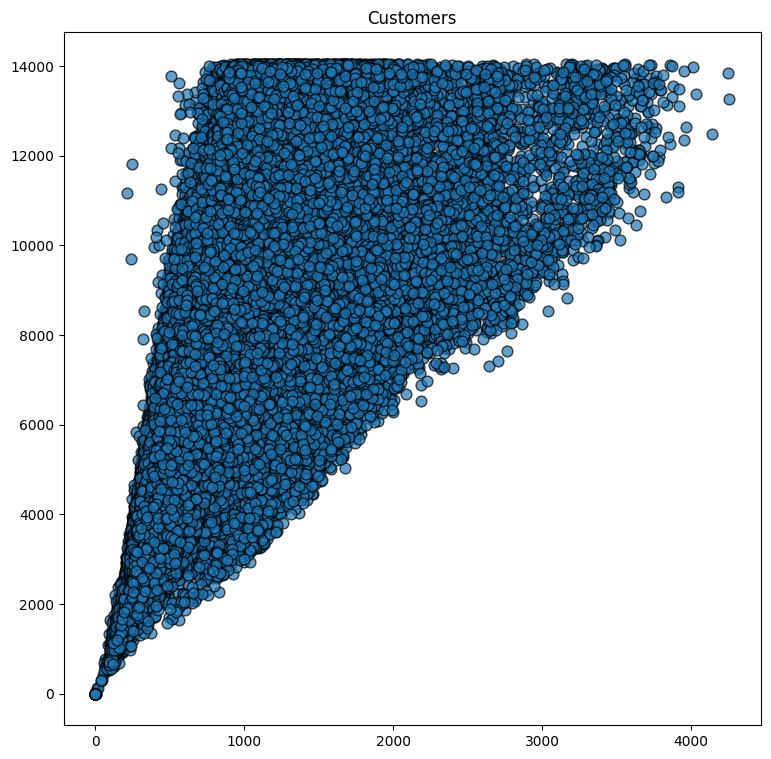

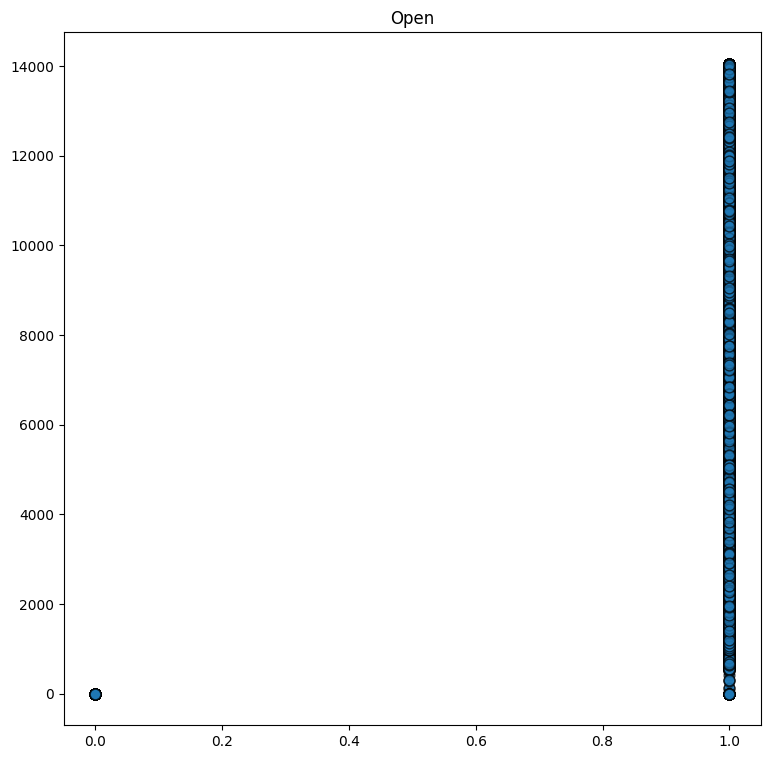

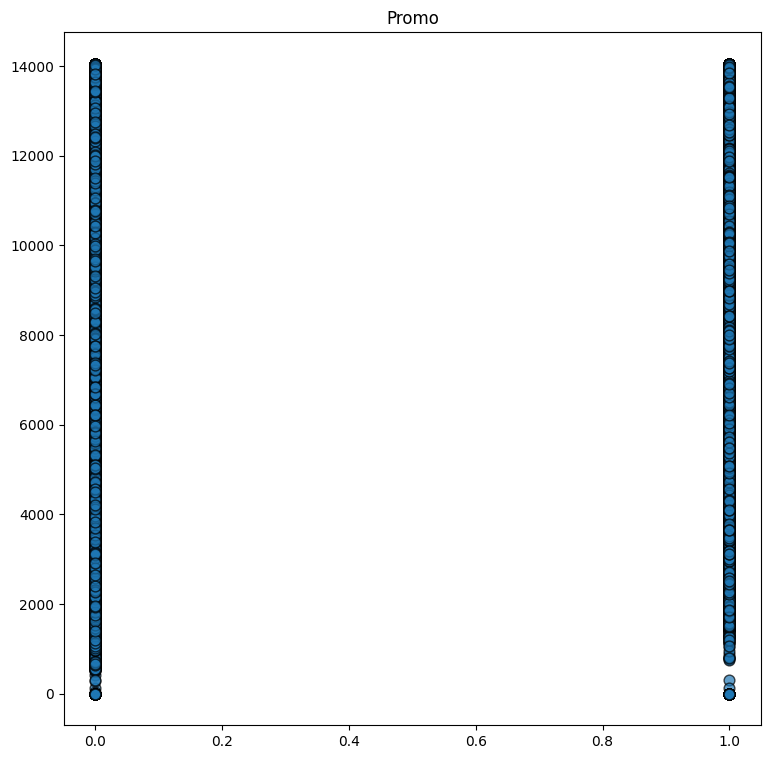

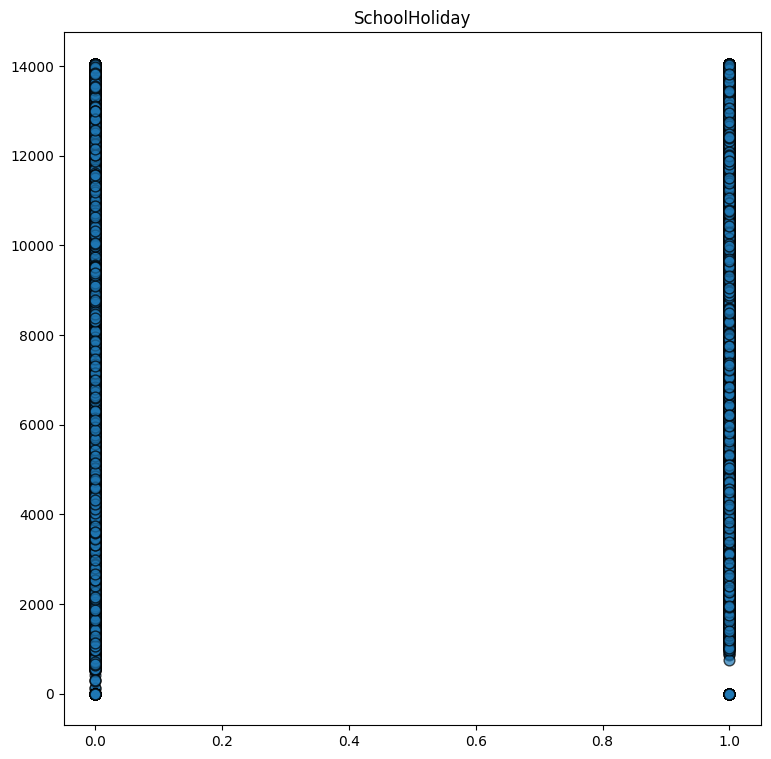

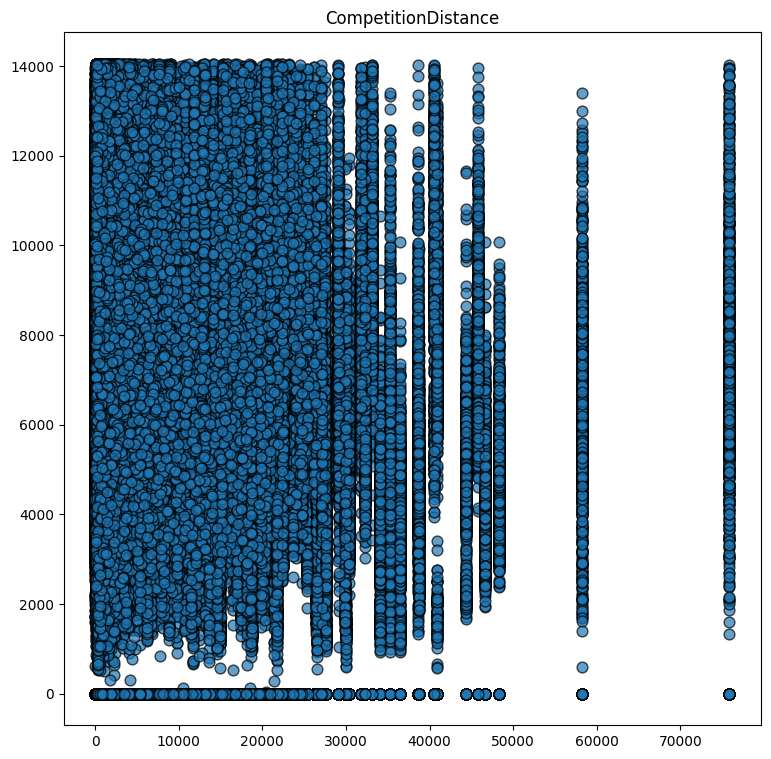

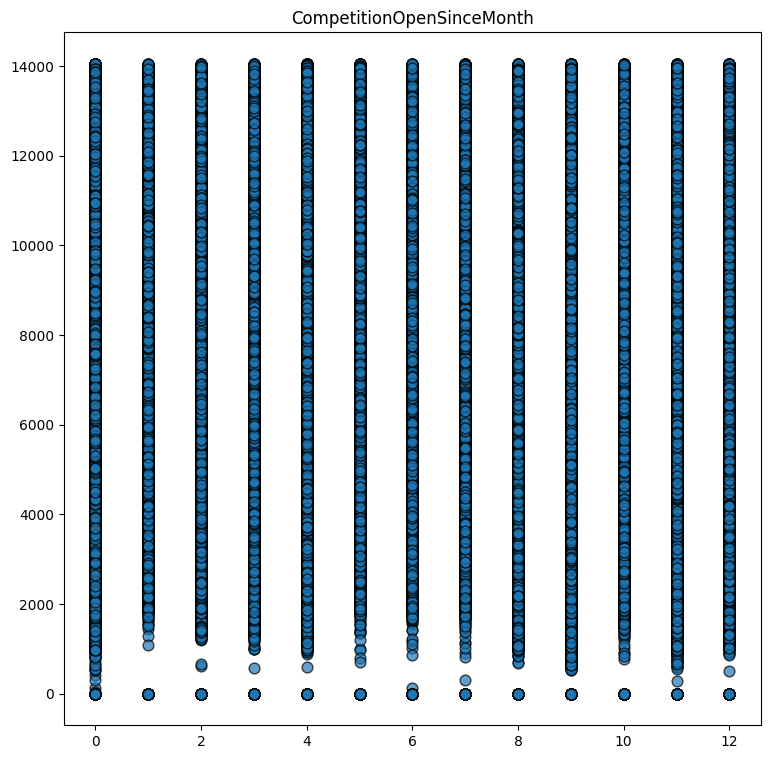

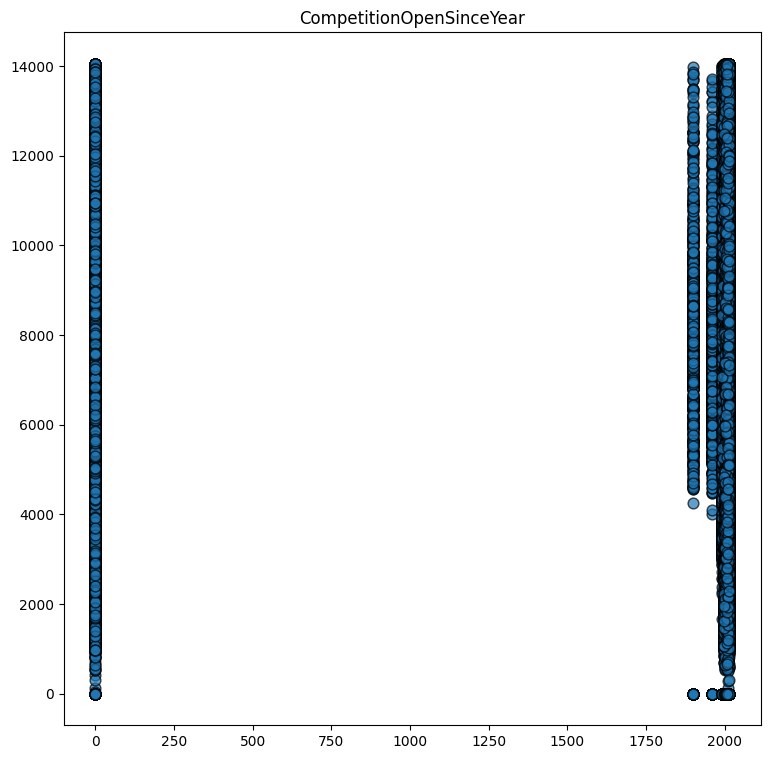

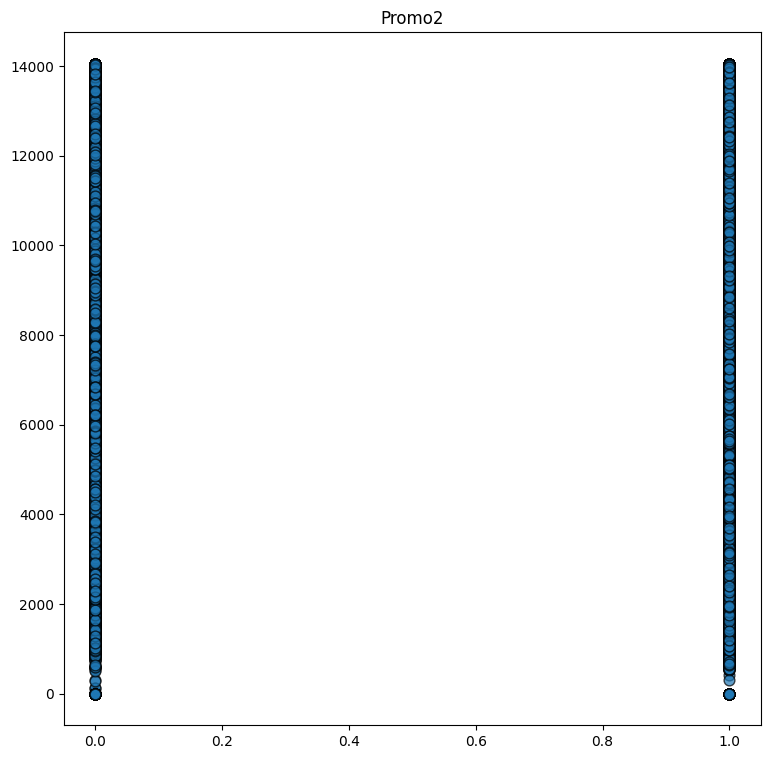

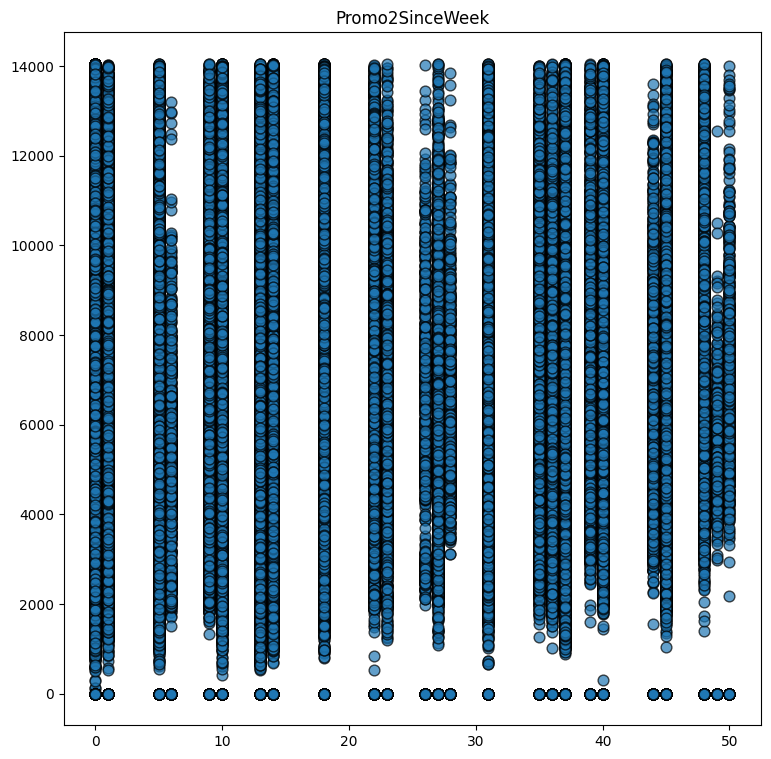

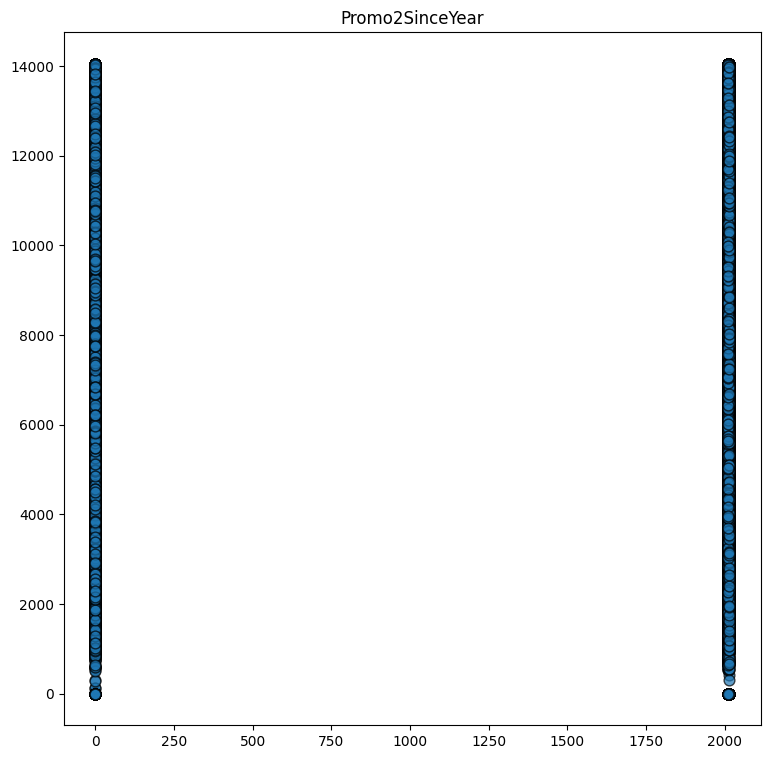

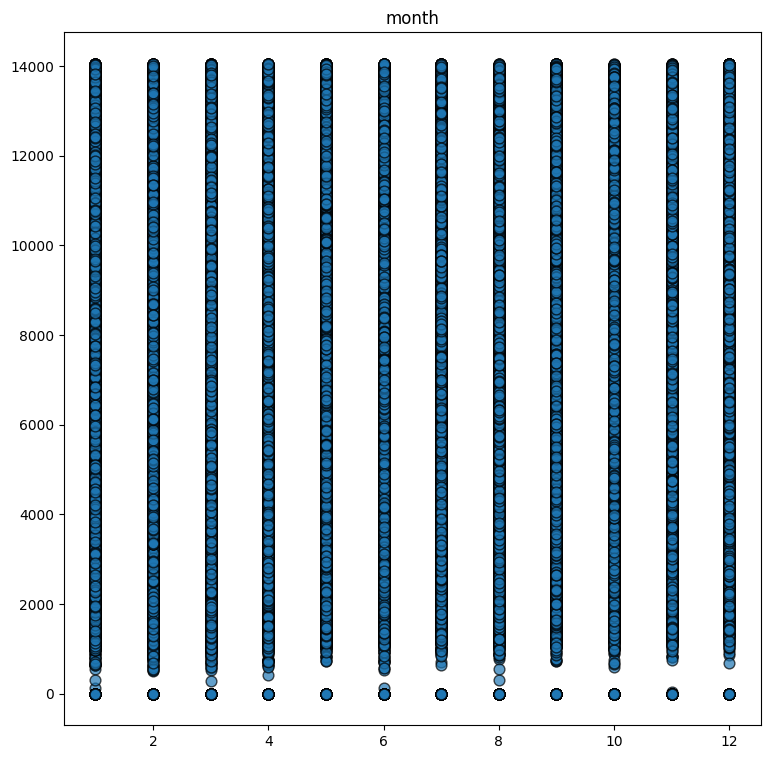

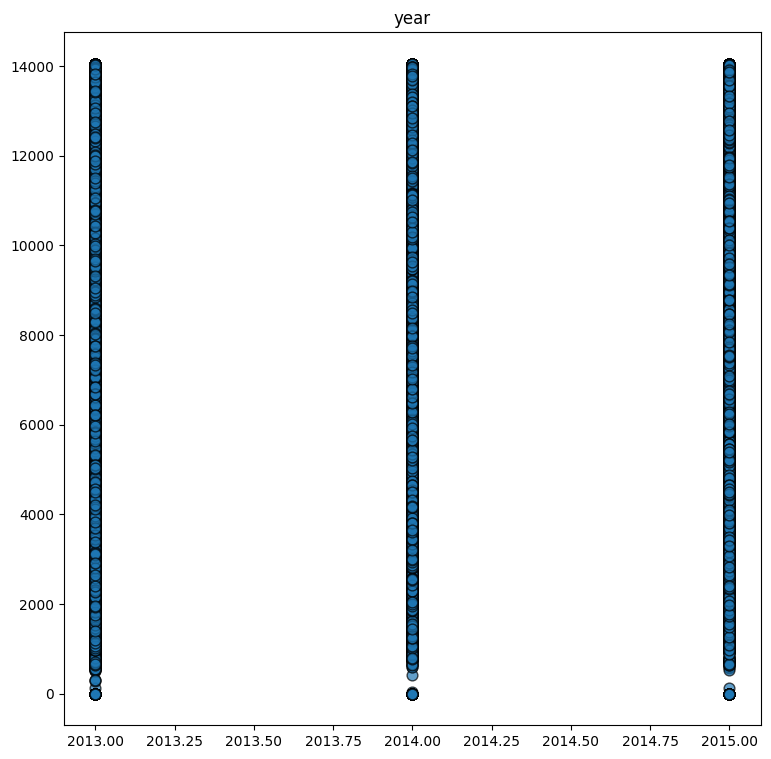

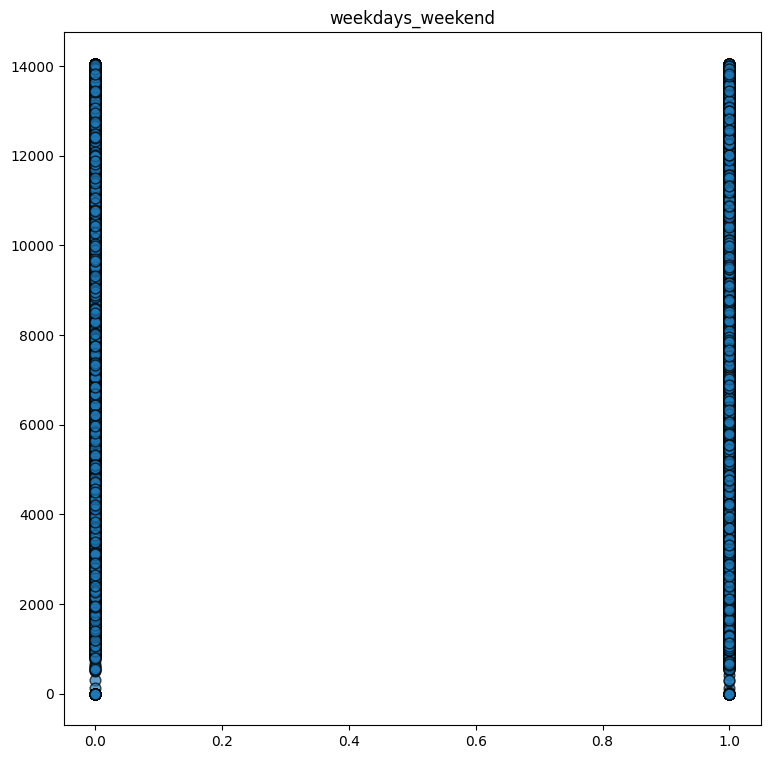

In [ ]:
# ploting scatter plot of each columns of dataset v/s rented bike count columns
for i in numeric_features[1:-1]:
  x = project[i]
  y = project['Sales']
  fig, ax = plt.subplots(figsize = (9, 9))
  ax.scatter(x, y, s=60, alpha=0.7, edgecolors="black")
  xseq = np.linspace(0, 10, num=100)
  ax.plot( color="r", lw=2.5)
  ax.set_title(i)
plt.show()

<ipython-input-49-7dea39e02b89>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=project.corr()


<Axes: >

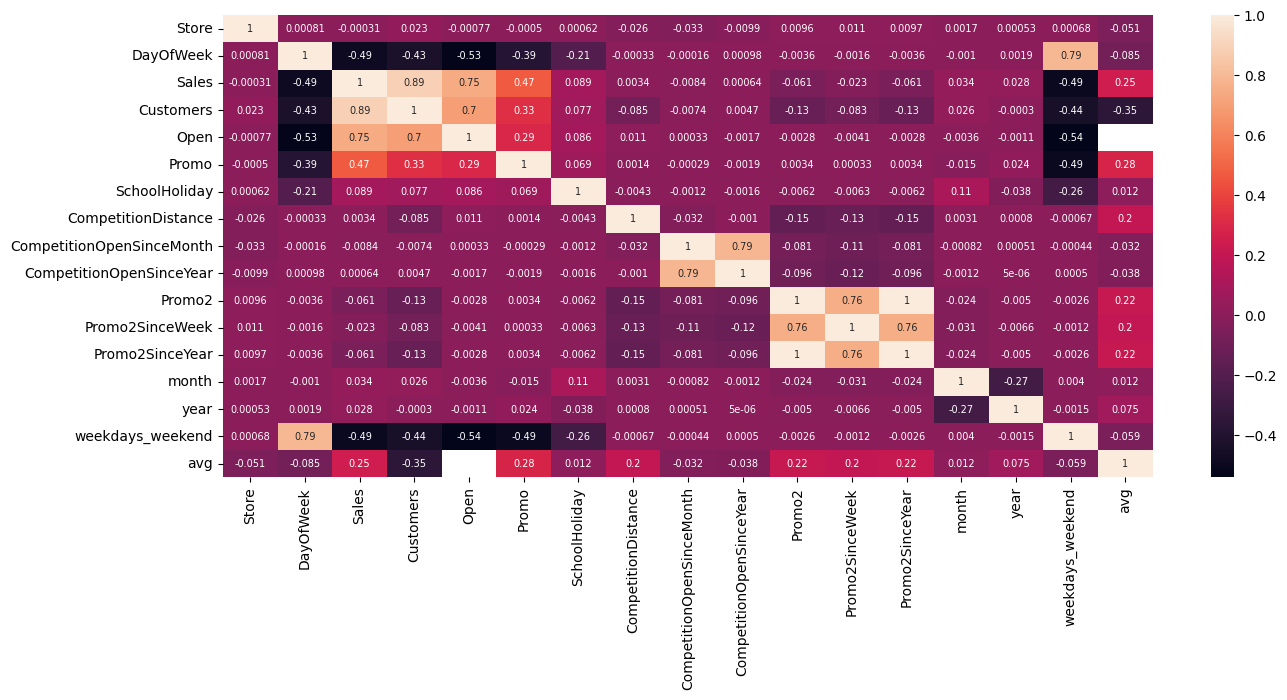

In [ ]:
plt.figure(figsize=(15,6))
#checking correlation using heatmap
correlation=project.corr()
sns.heatmap(correlation, annot=True, annot_kws={"size": 7})

# **Handling Multicollinearity**

In [ ]:
# Multicollinearity
# vif function
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
#replacing missing values with 0
project['avg']= project['avg'].fillna(0 )

In [ ]:
# Calculating VIF
calc_vif(project[[i for i in project.describe().columns if i not in ['Sales','Store','weekdays_weekend','DayOfWeek',
                                                                     'CompetitionOpenSinceYear','Promo2SinceWeek','avg']]])

variables           VIF
0                  Customers  7.003606e+00
1                       Open  1.153170e+01
2                      Promo  1.813700e+00
3              SchoolHoliday  1.241609e+00
4        CompetitionDistance  1.582097e+00
5  CompetitionOpenSinceMonth  2.354866e+00
6                     Promo2  1.479180e+06
7            Promo2SinceYear  1.479171e+06
8                      month  4.144106e+00
9                       year  1.242670e+01

In [ ]:
# Numeric Features
numerical_features = [  'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
        'Promo2','Promo2SinceYear', 'month', 'year']

## **Lable Encoding for categorical data**

In [ ]:
#Extracting categorical features
categorical_features = project.describe(include=['object','category']).columns
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval',
       'day_of_week'],
      dtype='object')

In [ ]:
project['StateHoliday'] =project['StateHoliday'].replace({0: '0'})

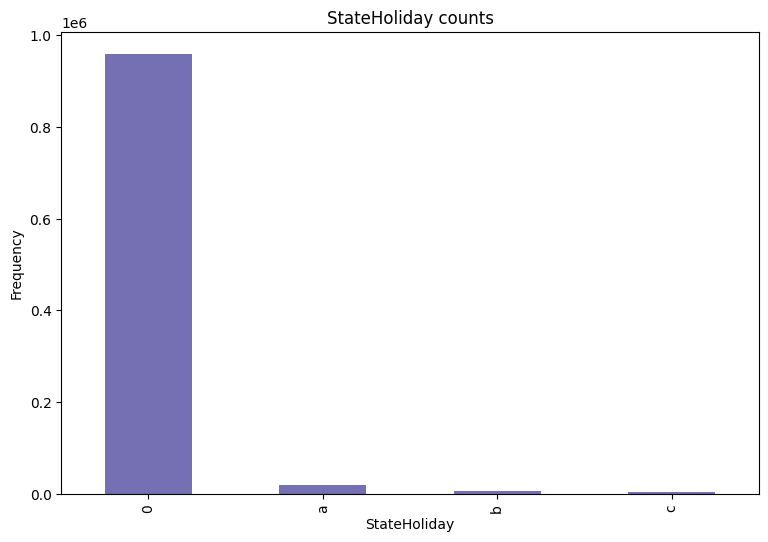

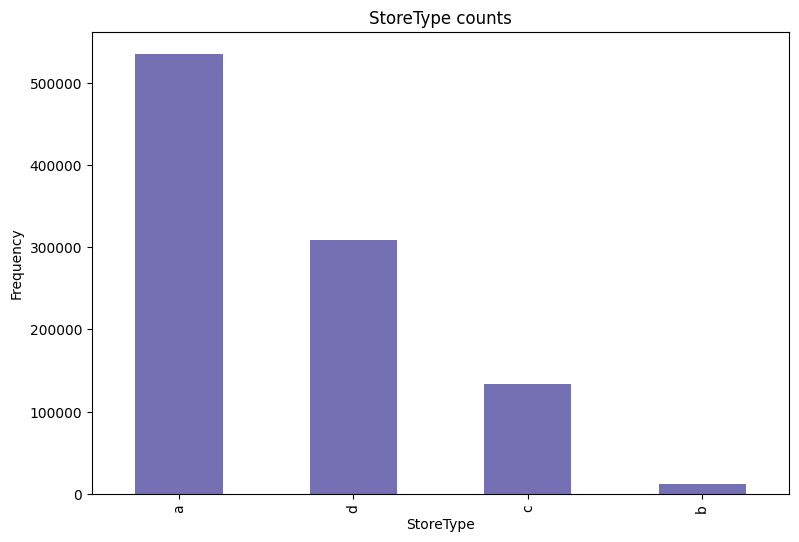

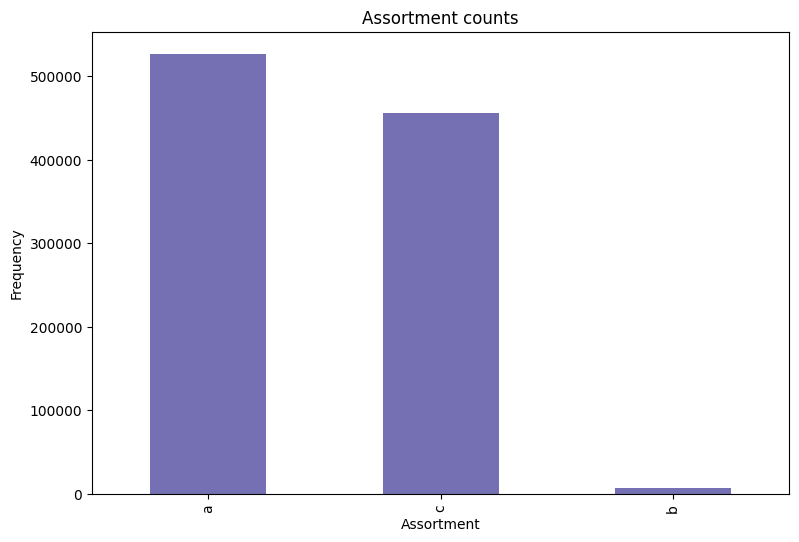

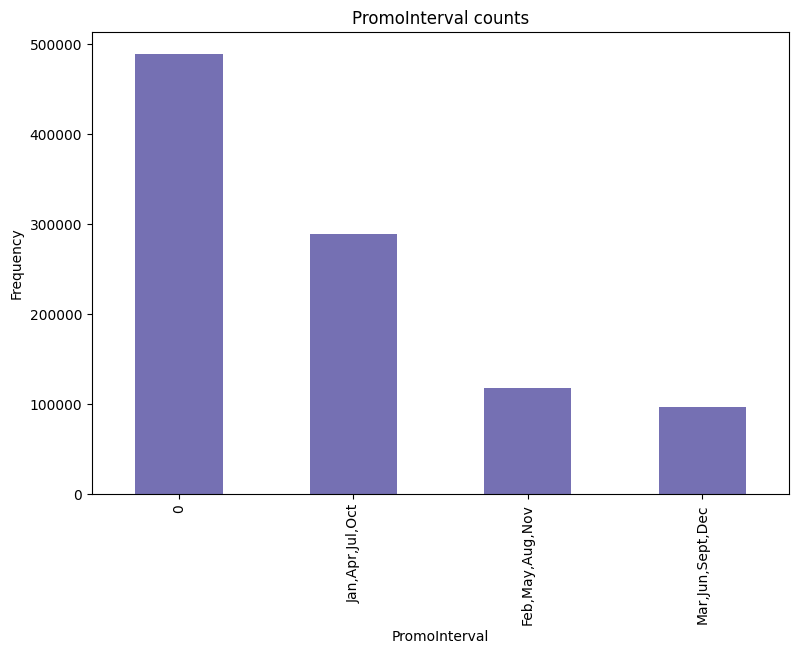

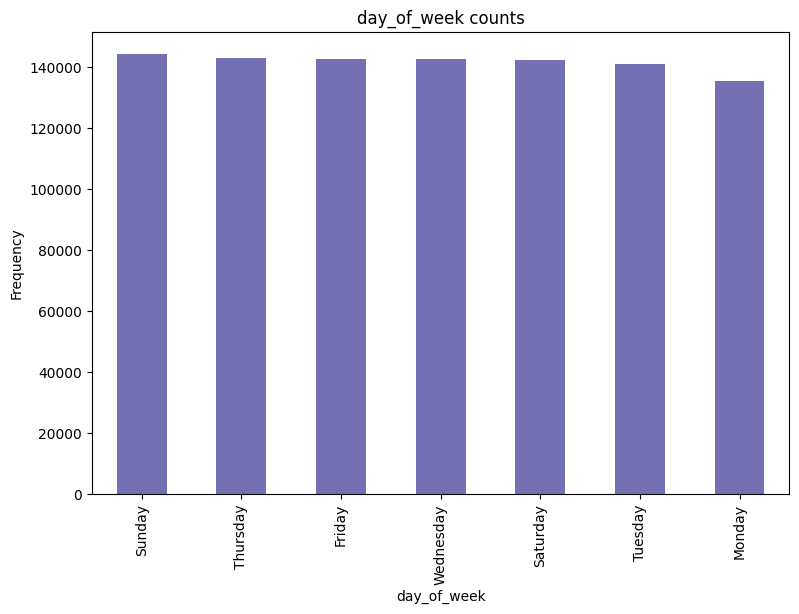

In [ ]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = project[col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color="#7570B3")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

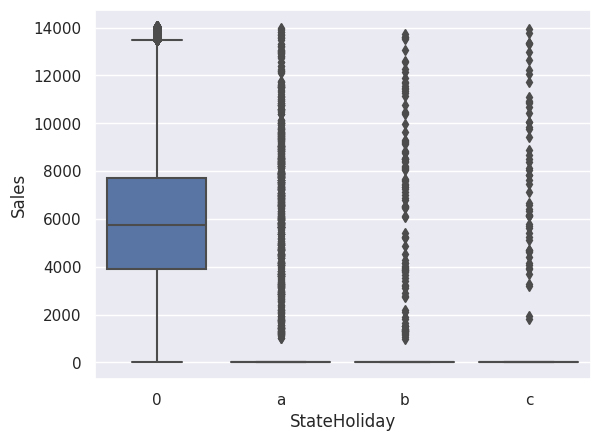

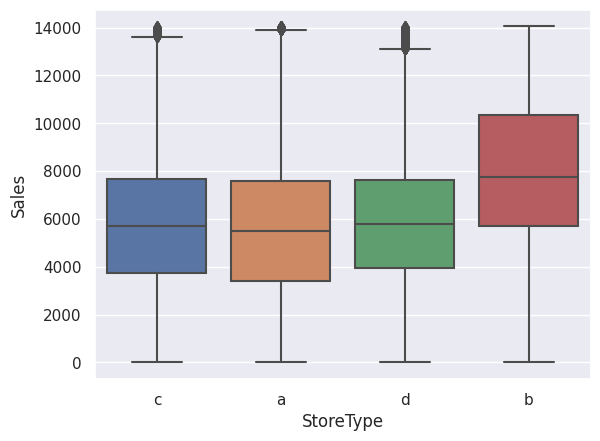

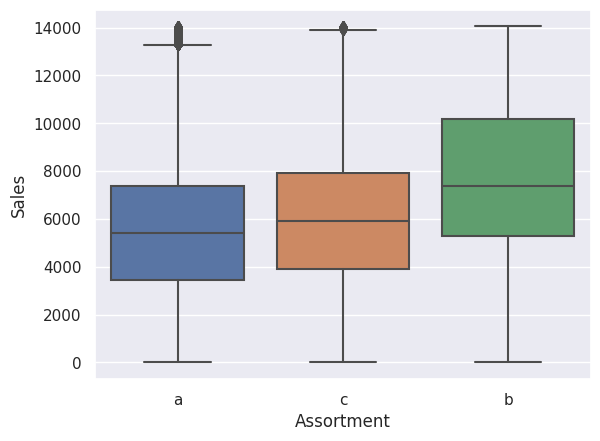

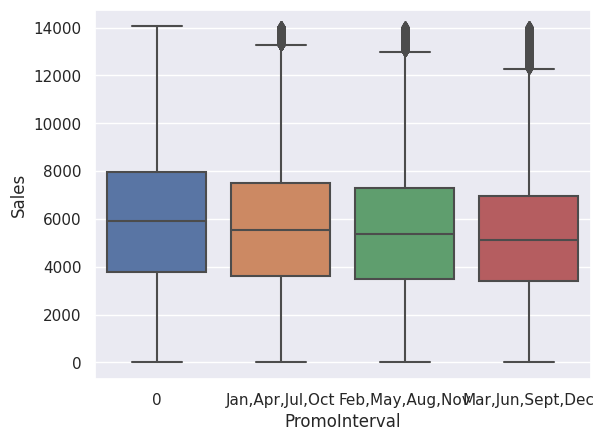

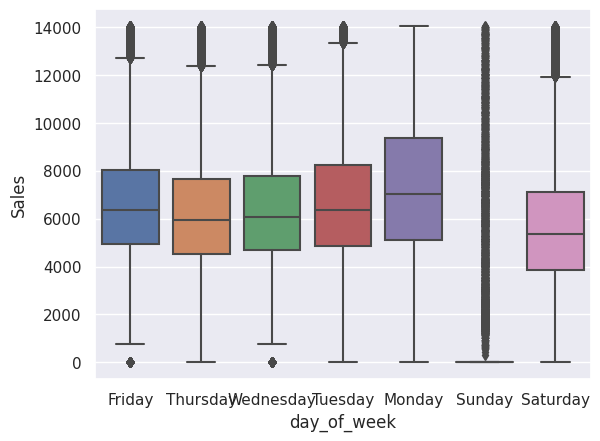

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features: 
  sns.set(style="darkgrid")

  sns.boxplot(x=project[col],y=project['Sales'])
  plt.show()

In [ ]:
### Data encoding
#label encoding
encode={'Assortment':{'a':1,'b':3,'c':2},'StoreType':{'a':1,'b':2,'c':3,'d':4}}
project2= project.replace(encode)

In [ ]:
#add numerical and categorical feature
features = numerical_features.copy()
features.extend(['StoreType' ,'Assortment'])

# **Model Implementation**

In [ ]:
#Spliting  data
X = project2[features]
Y = project2['Sales']

In [ ]:
#showing head of final X
X.head()

Customers  Open  Promo  SchoolHoliday  CompetitionDistance  \
0        555     1      1              1               1270.0   
1        625     1      1              1                570.0   
2        821     1      1              1              14130.0   
3       1498     1      1              1                620.0   
4        559     1      1              1              29910.0   

   CompetitionOpenSinceMonth  Promo2  Promo2SinceYear  month  year  StoreType  \
0                        9.0       0              0.0      7  2015          3   
1                       11.0       1           2010.0      7  2015          1   
2                       12.0       1           2011.0      7  2015          1   
3                        9.0       0              0.0      7  2015          3   
4                        4.0       0              0.0      7  2015          1   

   Assortment  
0           1  
1           1  
2           1  
3           2  
4           1

In [ ]:
# Train - Spliting  data
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(792412, 12)
(198103, 12)


In [ ]:
#scaling data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **`Modelling:`**
### These are the columns that i kept for modelling ['Store','DayOfWeek''Customers','Open','Promo','SchoolHoliday','CompetitionDistance','Promo2','StoreType','PromoInterval'] and outcome veriable is [ 'sales'] 
### Ill be using 
###LinearRegression
###Lasso regression 
###Ridge regression
###Elasticnet regression
###random forest

# **Function for evalution matrix**

In [ ]:
# Evalution matrics function for dataset
def evalutionmatrics(model,x_train,y_train,x_test,y_test,y_pred):

  testingscore=model.score(x_test,y_test)
  traningscore=model.score(x_train, y_train)
  r2 = r2_score(y_test,y_pred)
  mse  = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred)
  adjustedr2 = 1-(1-r2_score(y_test,y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

  return(traningscore,testingscore,r2,mse,rmse,mae,adjustedr2)

In [ ]:
# Evalution matrics function for print 
def evalutionmatric(model,x_train,y_train,x_test,y_test,y_pred):
   # Get Metrics
  traningscore=model.score(x_train, y_train)
  testingscore=model.score(x_test,y_test)
  r2 = r2_score(y_test,y_pred)
  mse  = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae=mean_absolute_error(y_test,y_pred)
  mape = mean_absolute_percentage_error(y_test, y_pred)
  adjustedr2 = 1-(1-r2_score(y_test,y_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

  print('\n================Evalution Matrics=========================\n')

  print('Training Score: ',round(traningscore,4))
  print('Testing Score: ',round(testingscore,4))
  print('RMSE:', round(rmse,4))
  print('R2:', round(r2,4))
  print('MAPE:', round(mape,4))
  print('Adjusted R2:', round(adjustedr2, 4) )
  print("MSE: ", round(mse,4) )
  print("MAE: ", round(mae,4) )

# **Function for vidualization**

In [ ]:
# vidualization function
def actualpredict(y_test,y_pred):
  '''
  shows the graph actual values and predicted values
  '''
  plt.figure(figsize=(8,5))
  plt.plot(y_pred[:100])
  plt.plot(np.array(y_test)[:100])
  plt.legend(["Predicted","Actual"])
  plt.show()

# **Function for feature importance**

In [ ]:
# feature importance function
def feature(model):
  importancesExtratree = model.feature_importances_
  importancesExtratreedict={'features':list(X.columns),'features importances':importancesExtratree}
  importancesExtratreedf=pd.DataFrame(importancesExtratreedict)
  # set plot style: grey grid in the background:
  sns.set(style="darkgrid")

  # load dataset
  tips = importancesExtratreedf.sort_values(['features importances'], ascending=False).reset_index(drop=True)

  # Set the figure size
  plt.figure(figsize=(10, 7))

  # plot a bar chart
  sns.barplot(
      x='features importances', 
      y='features', 
      data=tips, 
      estimator=sum, 
      ci=None, 
      color='maroon');

## **Implementing Linear Regression**

In [ ]:
# training model

linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)

LinearRegression()

In [105]:
# different metrics used
Y_predlr=linearreg.predict(X_test)
matrics =[evalutionmatrics(linearreg,X_train, Y_train,X_test,Y_test,Y_predlr)]
conclusion = pd.DataFrame(data = matrics, columns=['Training Score','Testing Score','R2 Score','MSE','RMSE','MAE','Adjusted R2 Score'])
conclusion.insert(0, 'Model', 'Linear Regression')
evalutionmatric(linearreg,X_train, Y_train,X_test,Y_test,Y_predlr)


================Evalution Matrics=========================

Training Score:  0.8636
Testing Score:  0.8623
RMSE: 1248.7878
R2: 0.8623
MAPE: 3.3929467939270016e+17
Adjusted R2: 0.8623
MSE:  1559471.0471
MAE:  889.0089


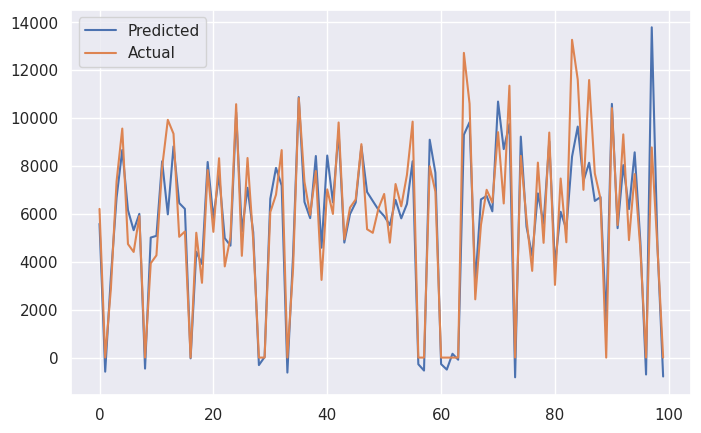

In [ ]:
# ploting the line graph of actual and predicted values
actualpredict(Y_test,Y_predlr)

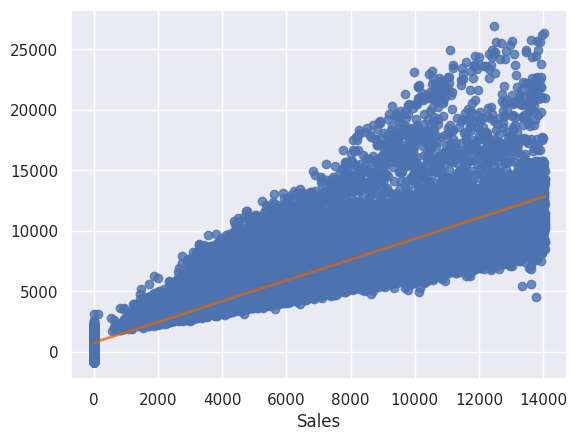

In [ ]:
#ploting scatter chat
sns.regplot(x=Y_test, y=Y_predlr, line_kws={"color":"#D95F02","alpha":0.7,"lw":2})
plt.show()

## **Implementing Lasso Regression**

In [ ]:
# finding the best parameters for lasso by gridsearchcv
lasso = Lasso()
alphaslasso= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1]}
lasso_regressor = GridSearchCV(lasso, alphaslasso)
# training model
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.916e+11, tolerance: 7.196e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.925e+11, tolerance: 7.194e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.930e+11, tolerance: 7.189e

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1]})

In [ ]:
# getting best parameters
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1e-15}


In [106]:
# different metrics used
Y_predlassor=lasso_regressor.predict(X_test)
matrics =list(evalutionmatrics(lasso_regressor,X_train, Y_train,X_test,Y_test,Y_predlassor))
matrics.insert(0,'Lasso Regression')
conclusion.loc[len(conclusion.index)] = matrics 
evalutionmatric(lasso_regressor,X_train, Y_train,X_test,Y_test,Y_predlassor)


================Evalution Matrics=========================

Training Score:  0.8632
Testing Score:  0.8618
RMSE: 1250.7228
R2: 0.8618
MAPE: 3.368192953515994e+17
Adjusted R2: 0.8618
MSE:  1564307.4152
MAE:  890.4133


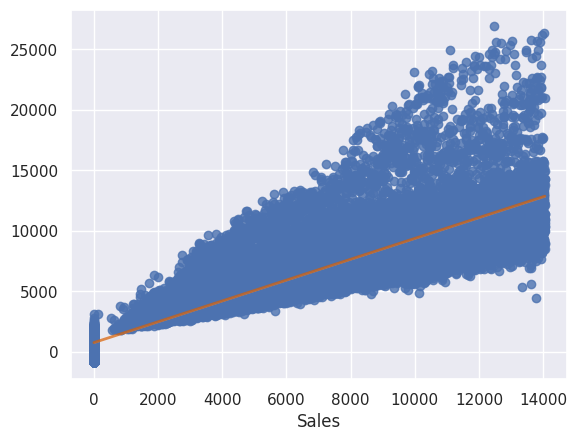

In [ ]:
#ploting scatter chat
sns.regplot(x=Y_test, y=Y_predlassor, line_kws={"color":"#D95F02","alpha":0.7,"lw":2})
plt.show()

## **Implementing Ridge Regression**

In [94]:
# finding the best parameters for ridge model by gridsearchcv
ridge = Ridge()
alphasRidge= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.001,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, alphasRidge, cv=3)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.001, 1, 5, 10, 20, 30,
                                   40, 45, 50, 55, 60, 100]})

In [95]:
# getting best parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1e-10}


In [107]:
# different metrics used
Y_predridge=ridge_regressor.predict(X_test)
matrics =list(evalutionmatrics(ridge_regressor,X_train, Y_train,X_test,Y_test,Y_predridge))
matrics.insert(0,'Ridge Regression')
conclusion.loc[len(conclusion.index)] = matrics 
evalutionmatric(ridge_regressor,X_train, Y_train,X_test,Y_test,Y_predridge)


================Evalution Matrics=========================

Training Score:  0.8636
Testing Score:  0.8623
RMSE: 1248.7878
R2: 0.8623
MAPE: 3.392946793848521e+17
Adjusted R2: 0.8623
MSE:  1559471.0471
MAE:  889.0089


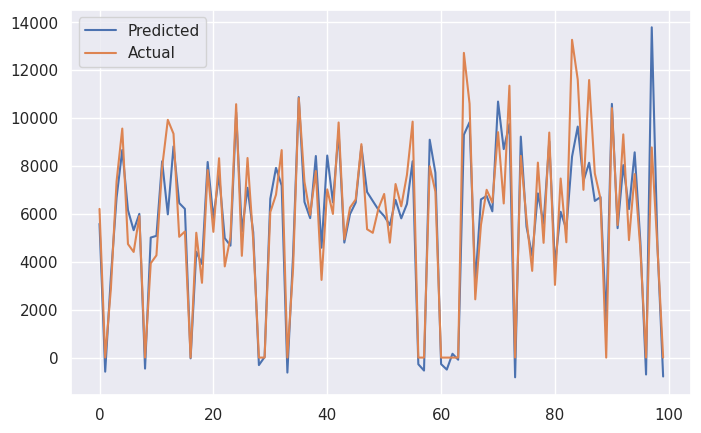

In [ ]:
 # ploting the line graph of actual and predicted values
actualpredict(Y_test,Y_predridge)

## **Implementing ElasticNet Regression**

In [ ]:
# finding the best parameters for elasticnet model by gridsearchcv
elastic = ElasticNet()
alphaselastic = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10],'l1_ratio':[0.3,0.4,0.5]}
elastic_regressor = GridSearchCV(elastic,alphaselastic)
elastic_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.916e+11, tolerance: 7.196e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.925e+11, tolerance: 7.194e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.930e+11, tolerance: 7.189e

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10],
                         'l1_ratio': [0.3, 0.4, 0.5]})

In [ ]:
# getting best parameters
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.3}


In [108]:
# different metrics used
Y_predelastic=elastic_regressor.predict(X_test)
matrics =list(evalutionmatrics(elastic_regressor,X_train, Y_train,X_test,Y_test,Y_predelastic))
matrics.insert(0,'Elasticnet Regression')
conclusion.loc[len(conclusion.index)] = matrics 
evalutionmatric(elastic_regressor,X_train, Y_train,X_test,Y_test,Y_predelastic)


================Evalution Matrics=========================

Training Score:  0.8632
Testing Score:  0.8618
RMSE: 1250.7228
R2: 0.8618
MAPE: 3.368192953515988e+17
Adjusted R2: 0.8618
MSE:  1564307.4152
MAE:  890.4133


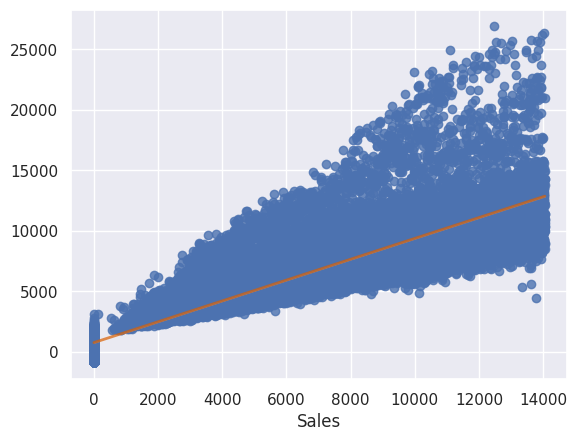

In [ ]:
 # ploting the line graph of actual and predicted values
sns.regplot(x=Y_test, y=Y_predelastic, line_kws={"color":"#D95F02","alpha":0.7,"lw":2})
plt.show()

# **Implementing Decision Tree Regression**

In [97]:
# training model
dtreg = DecisionTreeRegressor(random_state = 0) 
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [109]:
# different metrics used
Y_preddt=dtreg.predict(X_test)
matrics =list(evalutionmatrics(dtreg,X_train, Y_train,X_test,Y_test,Y_preddt))
matrics.insert(0,'Decision Tree Regression')
conclusion.loc[len(conclusion.index)] = matrics 
evalutionmatric(dtreg,X_train, Y_train,X_test,Y_test,Y_preddt)


================Evalution Matrics=========================

Training Score:  0.9999
Testing Score:  0.9708
RMSE: 575.1451
R2: 0.9708
MAPE: 0.0581
Adjusted R2: 0.9708
MSE:  330791.8404
MAE:  373.8204


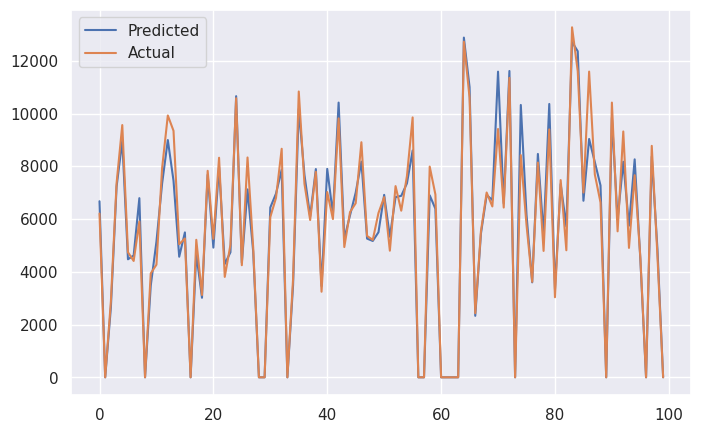

In [99]:
# ploting the line graph of actual and predicted values
actualpredict(Y_test,Y_preddt)

<ipython-input-67-c64df3612f24>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


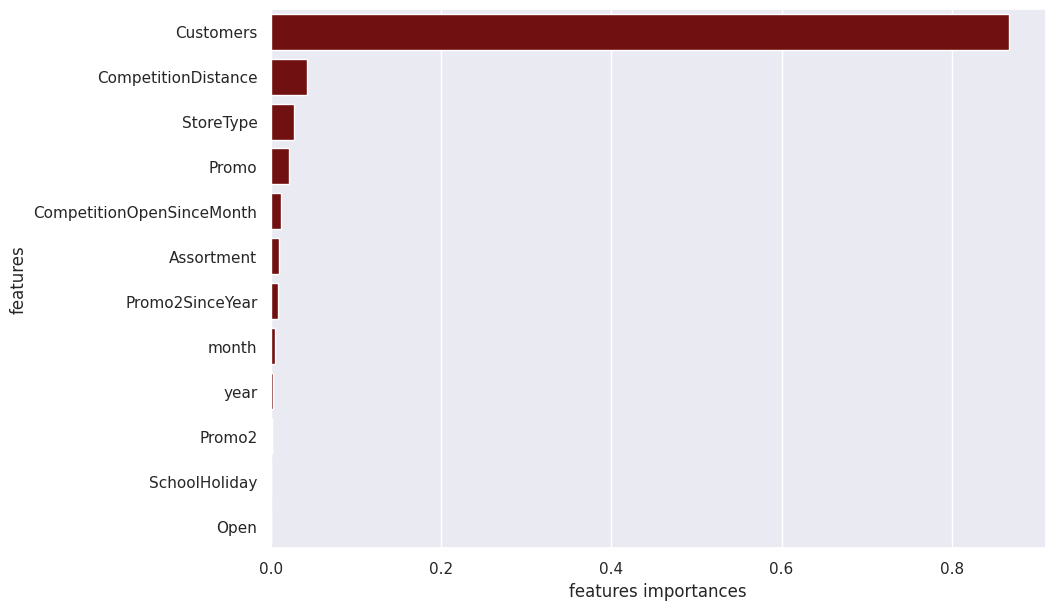

In [100]:
#Feature Importance for Decision Tree model
feature(dtreg)

## **Implementing RandomForest Regression**

In [ ]:
# finding the best parameters for randomforest model by gridsearchcv
randomforest_regressor = RandomForestRegressor(min_samples_leaf=1,min_samples_split=2,n_estimators=60)
randomforest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=60)

In [110]:
# different metrics used
Y_predrf=randomforest_regressor.predict(X_test)
matrics =list(evalutionmatrics(randomforest_regressor,X_train, Y_train,X_test,Y_test,Y_predrf))
matrics.insert(0,'Random Forest Regression')
conclusion.loc[len(conclusion.index)] = matrics 
evalutionmatric(randomforest_regressor,X_train, Y_train,X_test,Y_test,Y_predrf)


================Evalution Matrics=========================

Training Score:  0.9976
Testing Score:  0.9835
RMSE: 431.699
R2: 0.9835
MAPE: 0.044
Adjusted R2: 0.9835
MSE:  186364.063
MAE:  283.0197


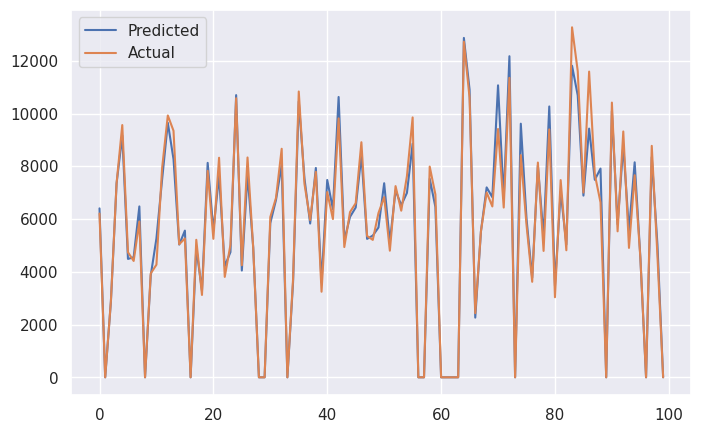

In [102]:
 # ploting the line graph of actual and predicted values
actualpredict(Y_test,Y_predrf)

<ipython-input-67-c64df3612f24>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


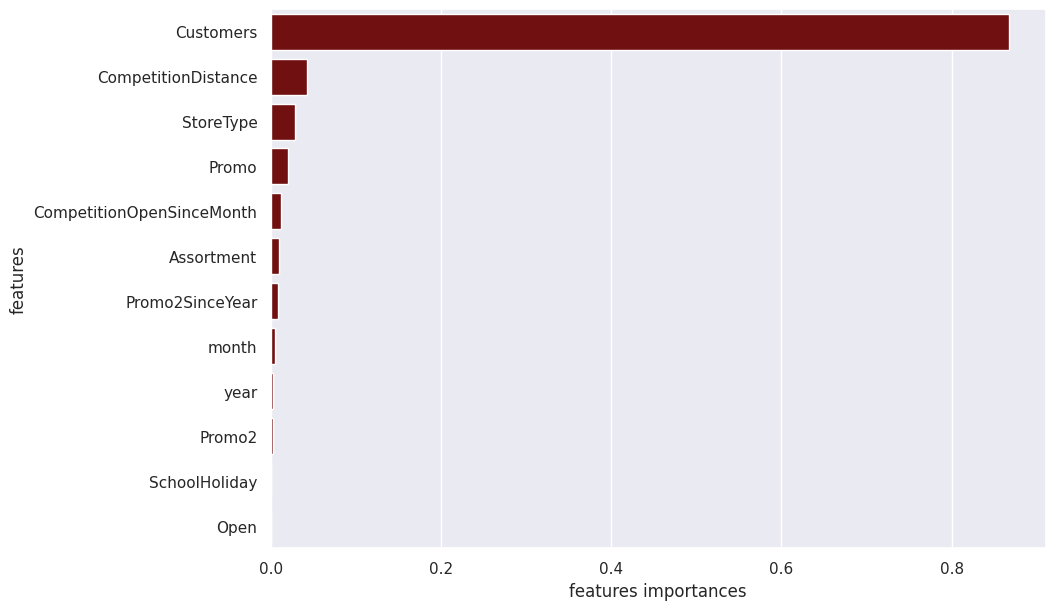

In [103]:
#Feature Importance for random forest model
feature(randomforest_regressor)

# **conclusion**


In [111]:
#final evalution matrics
conclusion

Model  Training Score  Testing Score  R2 Score  \
0         Linear Regression        0.863594       0.862271  0.862271   
1          Lasso Regression        0.863164       0.861844  0.861844   
2          Ridge Regression        0.863594       0.862271  0.862271   
3     Elasticnet Regression        0.863164       0.861844  0.861844   
4  Decision Tree Regression        0.999859       0.970785  0.970785   
5  Random Forest Regression        0.997575       0.983541  0.983541   

            MSE         RMSE         MAE  Adjusted R2 Score  
0  1.559471e+06  1248.787831  889.008884           0.862263  
1  1.564307e+06  1250.722757  890.413289           0.861836  
2  1.559471e+06  1248.787831  889.008884           0.862263  
3  1.564307e+06  1250.722757  890.413289           0.861836  
4  3.307918e+05   575.145060  373.820443           0.970783  
5  1.863641e+05   431.699042  283.019724           0.983540

### **Mean Absolute Percentage Error (MAPE) :** is the mean of all absolute percentage errors between the predicted and actual values.It is a popular metric to use as it returns the error as a percentage, making it both easy for end users to understand and simple to compare model accuracy across use cases and datasets.
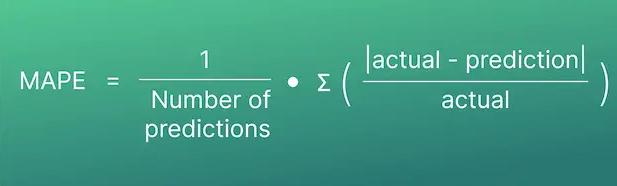

## **EDA Final Conclusion**
###our business growth is slowing compared to the previous year in terms of sales and customers
###Sales and customers both increase at the end of the year
###Christmas festival is good for our business
###School holiday affects 17% of our business
###Most of our revenue comes from a and d type stores
###In year 2015 sales increased but customers decreasing
###compare to sales promotion affect our bussines
### Store Type B has the most sales and customers
### Store Type D has the highest average spend per customer

#**Final Conclusion**
### Random forest model gives better results compared to other models
### random forest model gives 99% tranining accuracy and 98% testing accureacy 
### random forest model gives less random mean squer error compare to other models.
###Random Forest regressor achieved lowest MAPE as 4.45% showing that it is a highly accurate model